# Ford Go Bike Data Exploration
## by Mostafa Hasan Mahmoud

## Preliminary Wrangling

> This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area from 2019-02-01 to 2019-02-28 with a total of 28 days, containing 183412 rows and 16 columns.

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading in the 'fordgobike-tripdata' dataset into a 'fgb' pandas dataframe.

fgb = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
# High-level overview of data shape and composition.

print(fgb.shape)
print(fgb.dtypes)
print(fgb.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
# Descriptive statistics for numeric variables

print(fgb.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

## Data Cleaning

In [5]:
# Converting the (start_time, end_time) columns from object to datetime using the to_datetime() method.

fgb['start_time'] = pd.to_datetime(fgb['start_time'])
fgb['end_time'] = pd.to_datetime(fgb['end_time'])
fgb.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [6]:
# Adding day and hour columns to fgb dataframe.

fgb['stday_name'] = fgb.start_time.dt.day_name()
fgb['stday_num'] = fgb.start_time.dt.day
fgb['sthour'] = fgb.start_time.dt.hour


fgb['enday_name'] = fgb.end_time.dt.day_name()
fgb['enday_num'] = fgb.end_time.dt.day
fgb['enhour'] = fgb.end_time.dt.hour

In [7]:
# Creating a new column for the members age in 2019.

fgb['member_age_2019'] = fgb.end_time.dt.year.max() - fgb['member_birth_year']
fgb.head(3)

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
1                            Berry St at 4th St             37.775880  ...   
2  Powell St BART Station (Market St at 4th St)             37.786375  ...   

   member_birth_year  member_gender bike_share_for_all_trip  stday_name  \
0             1984.0           Male                      No    Thursday   
1                NaN            NaN                      No    Thursday   
2             1972.0           Male                      No    Thursday   

  stday_num sthour enday_name  enday_num  enhour member_age_2019  
0        28     17     Friday          1       8            35.0  
1        28     18     Friday          1       6             NaN  
2        28     12     Friday          1       5            47.0  

[3 rows x 23 columns]

In [8]:
# Dropping the columns ('member_birth_year', 'start_station_latitude', 'start_station_longitude', 
# 'end_station_latitude', 'end_station_longitude').

fgb.drop(columns=['member_birth_year', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
         inplace=True)

fgb.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_gender', 'bike_share_for_all_trip', 'stday_name',
       'stday_num', 'sthour', 'enday_name', 'enday_num', 'enhour',
       'member_age_2019'],
      dtype='object')

In [9]:
# Searching for null values.

fgb.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
end_station_id              197
end_station_name            197
bike_id                       0
user_type                     0
member_gender              8265
bike_share_for_all_trip       0
stday_name                    0
stday_num                     0
sthour                        0
enday_name                    0
enday_num                     0
enhour                        0
member_age_2019            8265
dtype: int64

In [10]:
# Removing the null values from the fgb dataframe.

fgb.dropna(inplace= True)
fgb.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
stday_name                 0
stday_num                  0
sthour                     0
enday_name                 0
enday_num                  0
enhour                     0
member_age_2019            0
dtype: int64

In [11]:
# Checking for duplicates in fgb dataframe.

fgb.duplicated().sum()

0

In [12]:
# Checking the number of unique values in each column in the fgb dataframe.

fgb.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
end_station_id                329
end_station_name              329
bike_id                      4607
user_type                       2
member_gender                   3
bike_share_for_all_trip         2
stday_name                      7
stday_num                      28
sthour                         24
enday_name                      7
enday_num                      28
enhour                         24
member_age_2019                75
dtype: int64

Found that:
1. Total station count is 329 station.
2. Total bikes count is 4607 bike.
3. There are 2 categories of users in User types.
4. Member gender consists of 3 types.
5. Members ages contains 75 unique value.

In [13]:
# I noticed that the unique values in "member_gender" are three, which needs further investigation.

fgb.member_gender.value_counts()       

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [14]:
fgb_Male_Sub_Bikesh = fgb.loc[(fgb['member_gender']=='Male') & (fgb['bike_share_for_all_trip']== 'No') 
                              & (fgb['user_type']== 'Subscriber')]
fgb_Male_Sub_Bikesh.shape

(105903, 18)

<b>Observed</b>

- Found "Other" value with the count of 3647 which is small value when compared to Males and Females.
- Also found the most riders are "Male".
- The total count of rides where gender is "Male", bike share is "No", and user type is "Subscriber" is 105903, 
  which is more than half of the data.

In [15]:
# More investigation for the "member_age_2019" column.

fgb.member_age_2019.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age_2019, dtype: float64

<b>Observed</b>

- The age ranges are between 18 and 141.
- The mean age is 34.
- Needs further investigation as there may be outliers.

In [16]:
# Convert user_type, member_gender, bike_share_for_all_trip, stday_name, enday_name into ordered categorical types.

ordinal_var_dict = {'user_type': ['Subscriber', 'Customer'],
                    'member_gender': ['Male', 'Female', 'Other'],
                    'bike_share_for_all_trip': ['No', 'Yes'],
                    'stday_name': ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                    'enday_name': ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fgb[var] = fgb[var].astype(ordered_var)

In [17]:
# Checking the data descriptive statistics for numeric variables after the cleaning process.

fgb.describe()

duration_sec  start_station_id  end_station_id        bike_id  \
count  174952.000000     174952.000000   174952.000000  174952.000000   
mean      704.002744        139.002126      136.604486    4482.587555   
std      1642.204905        111.648819      111.335635    1659.195937   
min        61.000000          3.000000        3.000000      11.000000   
25%       323.000000         47.000000       44.000000    3799.000000   
50%       510.000000        104.000000      101.000000    4960.000000   
75%       789.000000        239.000000      238.000000    5505.000000   
max     84548.000000        398.000000      398.000000    6645.000000   

           stday_num         sthour      enday_num         enhour  \
count  174952.000000  174952.000000  174952.000000  174952.000000   
mean       15.312337      13.456165      15.311714      13.609533   
std         8.033926       4.734282       8.034127       4.748029   
min         1.000000       0.000000       1.000000       0.000000   
25%         8.000000       9.000000       8.000000       9.000000   
50%        15.000000      14.000000      15.000000      14.000000   
75%        22.000000      17.000000      22.000000      18.000000   
max        28.000000      23.000000      28.000000      23.000000   

       member_age_2019  
count    174952.000000  
mean         34.196865  
std          10.118731  
min          18.000000  
25%          27.000000  
50%          32.000000  
75%          39.000000  
max         141.000000

<b>Observed</b>

- duration_sec needs further investigation as there may be outliers.
- member_age_2019 needs further investigation as there may be outliers.

In [18]:
# Checking the data columns, types, and shape after the cleaning process.

print(fgb.columns)
print(fgb.dtypes)
print(fgb.shape)

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_gender', 'bike_share_for_all_trip', 'stday_name',
       'stday_num', 'sthour', 'enday_name', 'enday_num', 'enhour',
       'member_age_2019'],
      dtype='object')
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                        category
member_gender                    category
bike_share_for_all_trip          category
stday_name                       category
stday_num                           int64
sthour                              int64
enday_name                       category
enday_num                    

### What is the structure of your dataset?

There are 174952 rows in the dataset (after the cleaning process) with 18 features.

<b>The 18 features columns are:</b>

['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip', 'stday_name', 'stday_num', 'sthour', 'enday_name', 'enday_num', 'enhour', 'member_age_2019']. 

Most variables are numeric in nature, but the variables (start_station_name, end_station_name) are nominal variables, (user_type, member_gender, bike_share_for_all_trip, stday_name, enday_name) are categorical variables, and (start_time, end_time) are datetime variables.

### What is/are the main feature(s) of interest in your dataset?

<b> I am more interested in discovering which features are better to predict with:</b>
1. What are the most used stations?
2. When are the peak hours?
3. When are most rides made in terms of the time of day and day of the week?
4. How long does the average ride take?
5. Does the duration of the ride depend on whether the user is a subscriber or a customer?
6. Who makes the most rides in terms of gender?
7. Do all bikes make the same number of rides?
8. Does the age of the user affect the ride duration?
9. Does the age of the user affect the user type?
  
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

<b> I expect that: </b>

['duration_sec', 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip', 'stday_name', 'stday_num', 
'sthour', 'member_age_2019'] 
       
<b>will have the strongest effect on my investigation.</b>

## Univariate Exploration

<b>I'll start by looking at the distribution of the main variable of interest: </b>


['duration_sec', 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip', 'stday_name', 'stday_num', 'sthour', 'member_age_2019']

In [19]:
fgb.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_gender', 'bike_share_for_all_trip', 'stday_name',
       'stday_num', 'sthour', 'enday_name', 'enday_num', 'enhour',
       'member_age_2019'],
      dtype='object')

In [20]:
# Creating a sample of 500 rides to use it when needed so that plots are clearer and they render faster.

samples = np.random.choice(fgb.shape[0], 500, replace = False)
fgb_samp = fgb.iloc[samples,:]

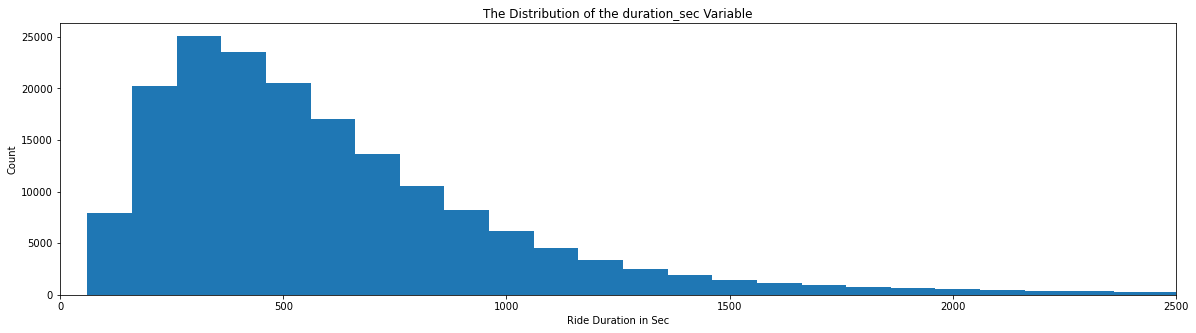

In [21]:
# Start by looking at the distribution of the duration_sec variable with a standard-scaled plot.

binsize = 100
bins = np.arange(61, fgb['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[20, 5])
plt.hist(data = fgb, x = 'duration_sec', bins = bins)
plt.xlabel('Ride Duration in Sec')
plt.ylabel('Count')
plt.title('The Distribution of the duration_sec Variable')
plt.xlim(0, 2500)
plt.show()

<b>Observed</b>

- There are some outliers after Ride duration of 8000 seconds.

In [22]:
# Removing outliers that caused the high difference in the descriptive data for the duration_sec column.

fgb = fgb.query('duration_sec < 8000')
fgb.shape

(174478, 18)

In [23]:
# Checking the descriptive data for the duration_sec column after removing the outliers.

fgb.duration_sec.describe()

count    174478.000000
mean        641.954069
std         554.830569
min          61.000000
25%         322.000000
50%         509.000000
75%         785.000000
max        7958.000000
Name: duration_sec, dtype: float64

<b>Observed:</b>

- There is a beak between 261sec and 361sec.
- The duration_sec distribution looks unimodal.
- Duration in seconds has a long-tailed Right skewed distribution.

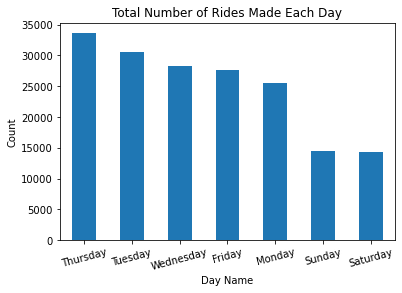

In [24]:
# Display the total number of rides made each day in descending order.

rides_stday_name = fgb.stday_name.value_counts()
rides_stday_name.plot(kind='bar');
plt.xticks(rotation=15);
plt.xlabel('Day Name')
plt.ylabel('Count')
plt.title('Total Number of Rides Made Each Day');

<b>Observed:</b>

- Noticed that the max rides is done on thursday.
- Min duration rides take place on Saturday and Sunday "weekend".

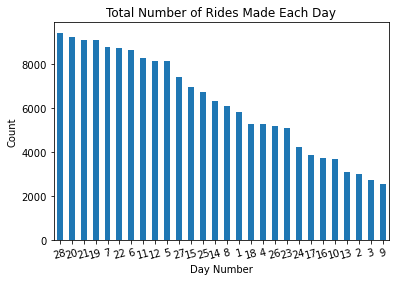

In [25]:
# Display the total number of rides made each day in descending order.

rides_stday_num = fgb.stday_num.value_counts()
rides_stday_num.plot(kind='bar');
plt.xticks(rotation=15);
plt.xlabel('Day Number')
plt.ylabel('Count')
plt.title('Total Number of Rides Made Each Day');

<b>Observed:</b>

- The highest days in the total number of rides are 28, 20, 21, and 19 respectively.

- The lowest days in the total number of rides are 9, 3, 2, and 13 respectively.


<b>Needs more investigation</b>

- The relation between "stday_num" and "stday_name".

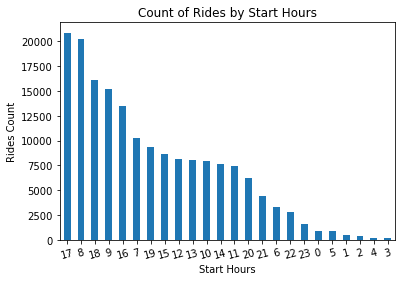

In [26]:
# Displaying the total number of rides done each start hour in descending order.

rides_sthour = fgb.sthour.value_counts()
rides_sthour.plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('Start Hours')
plt.ylabel('Rides Count')
plt.title('Count of Rides by Start Hours');

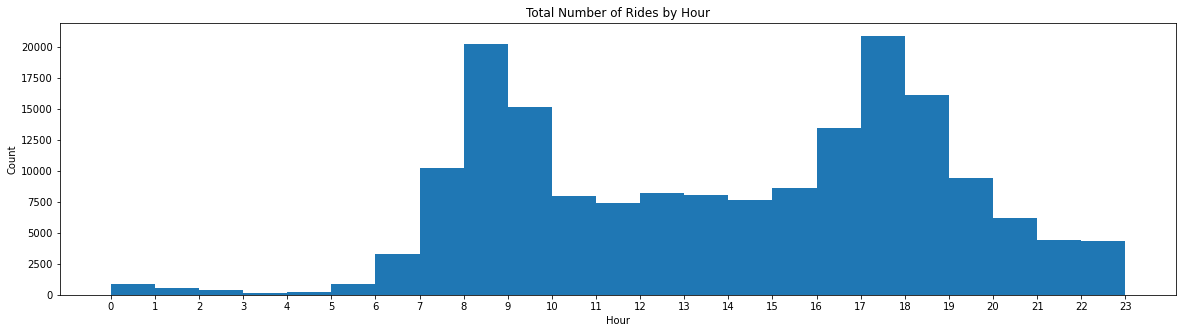

In [27]:
# Plotting total number of rides by hour.

plt.figure(figsize=[20, 5])
bins = np.arange(0, 24, 1)
fgb.sthour.plot(kind='hist', bins=bins)
plt.xticks(np.arange(0, 24, step=1));
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Total Number of Rides by Hour');

<b>Observed:</b>

- It was noted that the maximum rides take place at 5 pm and 8 am, respectively.
- Minimum rides are from 0 am to 6 am.

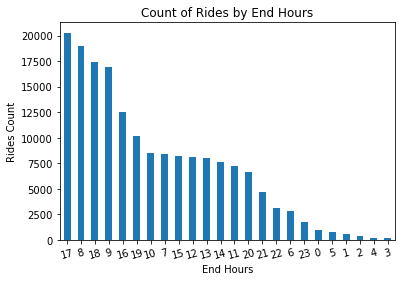

In [28]:
# Displaying the total number of rides done each end hour in descending order.

rides_enhour = fgb.enhour.value_counts()
rides_enhour.plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel('End Hours')
plt.ylabel('Rides Count')
plt.title('Count of Rides by End Hours');

<b>Observed:</b>

- It was noted that the maximum rides take place at 5 pm and 8 am, respectively.
- Minimum rides from 1 am to 3 am.
- The same as "sthour".

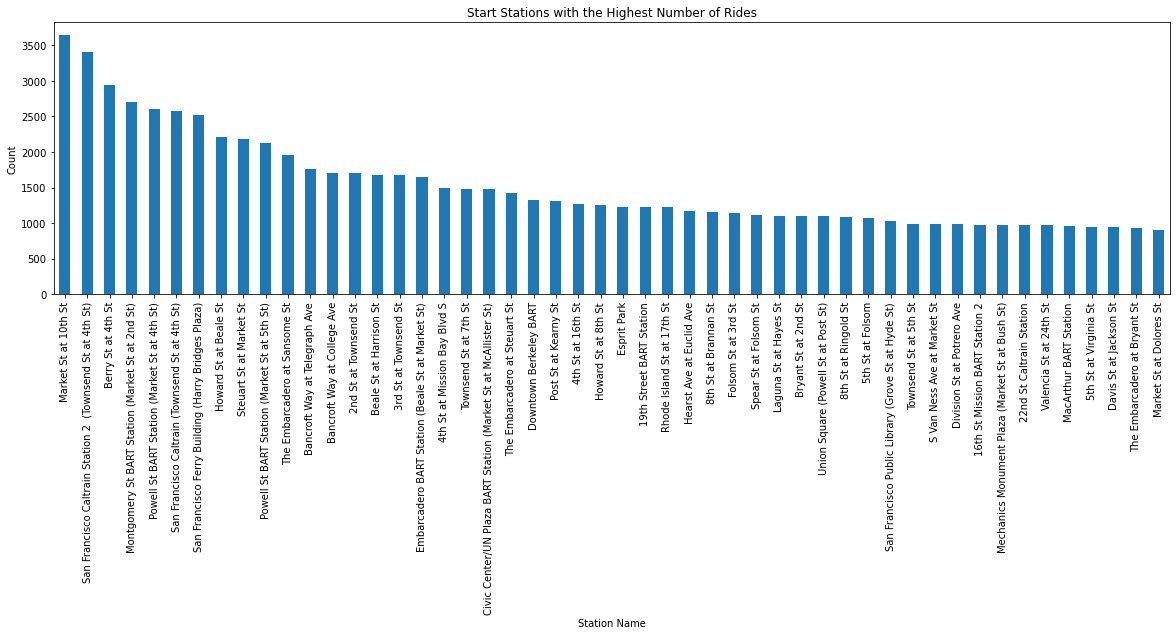

In [29]:
# Showing the start stations with the highest number of rides.

plt.figure(figsize=[20, 5])
fgb['start_station_name'].value_counts().iloc[0:50].plot(kind= 'bar');
plt.xlabel('Station Name')
plt.ylabel('Count')
plt.title('Start Stations with the Highest Number of Rides');

<b>Observed:</b>

- The highest starting stations in the total number of rides are ["Market St at 10th St", "San Francisco Caltrain Station 2  (Townsend St at 4th St)", "Berry St at 4th St"].

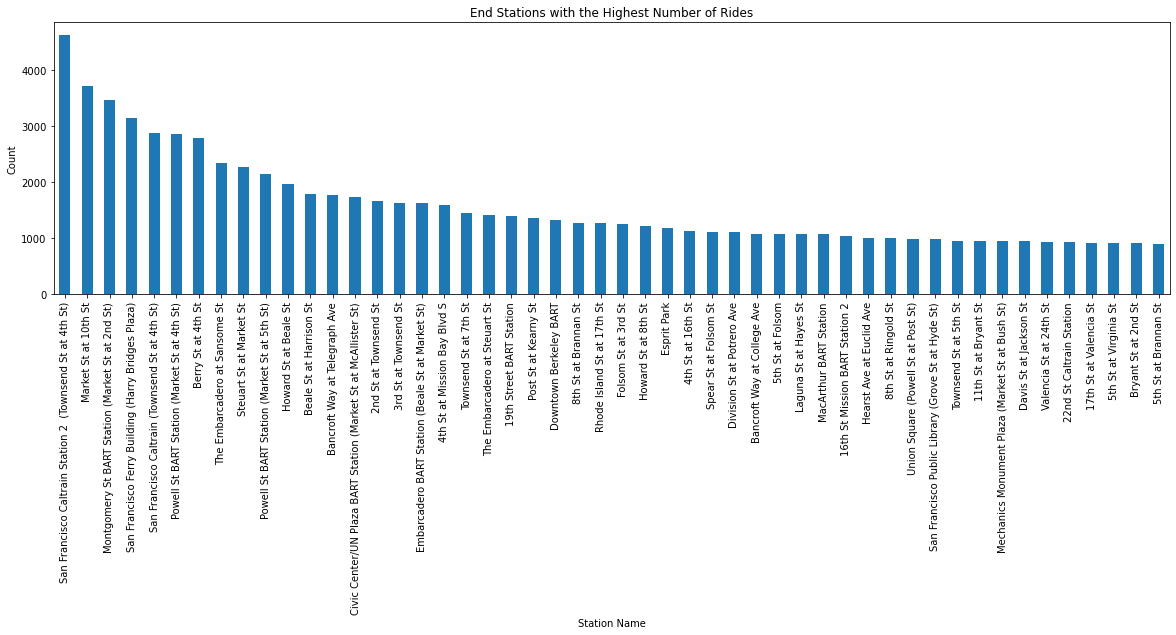

In [30]:
# Showing the end stations with the highest number of rides.

plt.figure(figsize=[20, 5])
fgb['end_station_name'].value_counts().iloc[0:50].plot(kind= 'bar');
plt.xlabel('Station Name')
plt.ylabel('Count')
plt.title('End Stations with the Highest Number of Rides');

<b>Observed:</b>

- The highest ending station in the total number of rides are ["San Francisco Caltrain Station 2  (Townsend St at 4th St)", "Market St at 10th St", "Montgomery St BART Station (Market St at 2nd St)"].

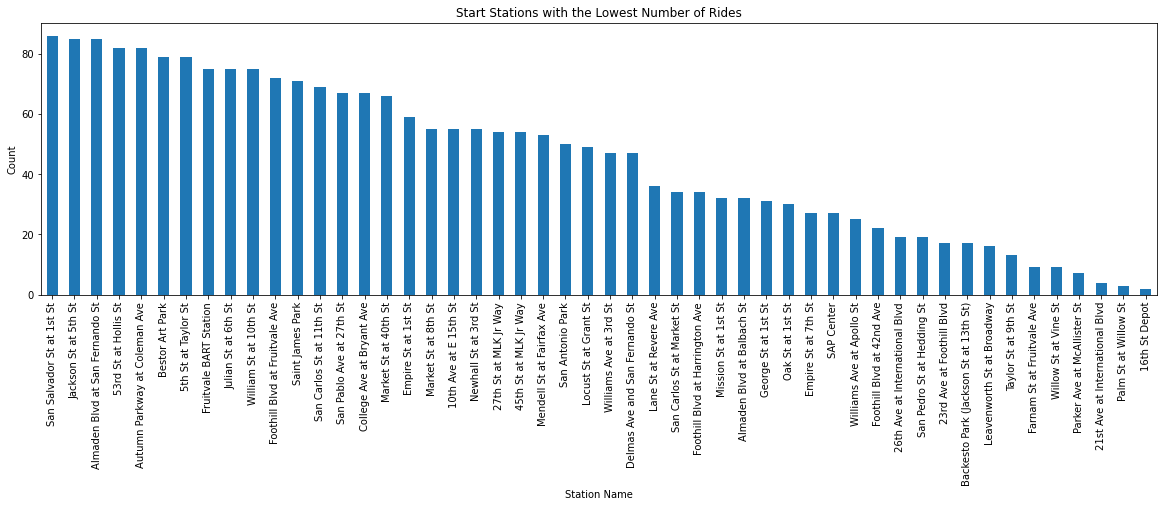

In [31]:
# Showing the start stations with the lowest number of rides.

plt.figure(figsize=[20, 5])
fgb['start_station_name'].value_counts().iloc[-50:].plot(kind= 'bar');
plt.xlabel('Station Name')
plt.ylabel('Count')
plt.title('Start Stations with the Lowest Number of Rides');

<b>Observed:</b>

- The lowest 3 starting stations in the total number of rides are ["21st Ave at International Blvd", "Palm St at Willow St", 
"16th St Depot".

<b>Needs more investigation</b>

- The relation between "start_station_name" and "end_station_name".

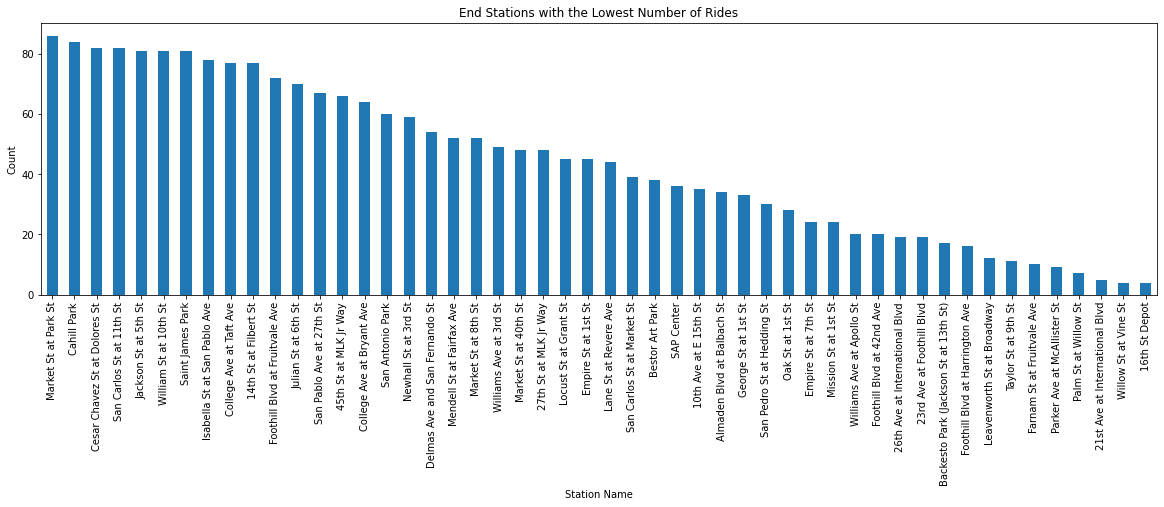

In [32]:
# Showing the end stations with the lowest number of rides.
plt.figure(figsize=[20, 5])
fgb['end_station_name'].value_counts().iloc[-50:].plot(kind= 'bar');
plt.xlabel('Station Name')
plt.ylabel('Count')
plt.title('End Stations with the Lowest Number of Rides');

<b>Observed:</b>

- The lowest 3 ending stations in the total number of rides are ["21st Ave at International Blvd", "16th St Depot", 
"Willow St at Vine St"].

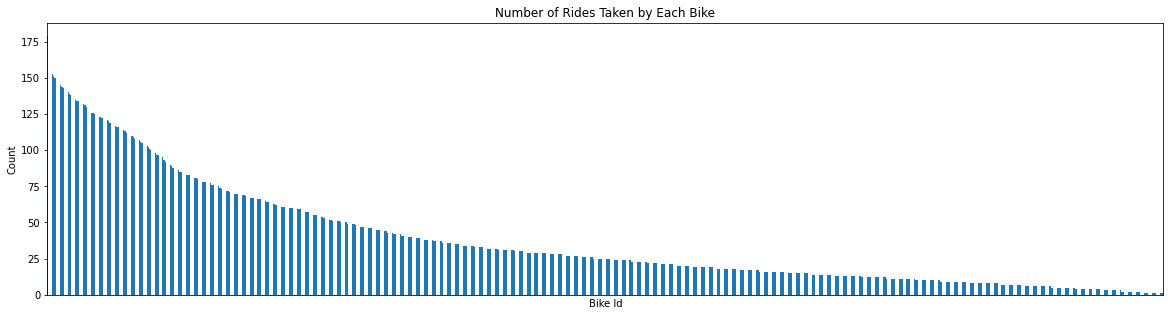

In [33]:
# Showing the number of rides taken by each bike.

plt.figure(figsize=[20, 5])
fgb.bike_id.value_counts().plot(kind = 'bar');
plt.xticks([]);
plt.xlabel('Bike Id')
plt.ylabel('Count')
plt.title('Number of Rides Taken by Each Bike');

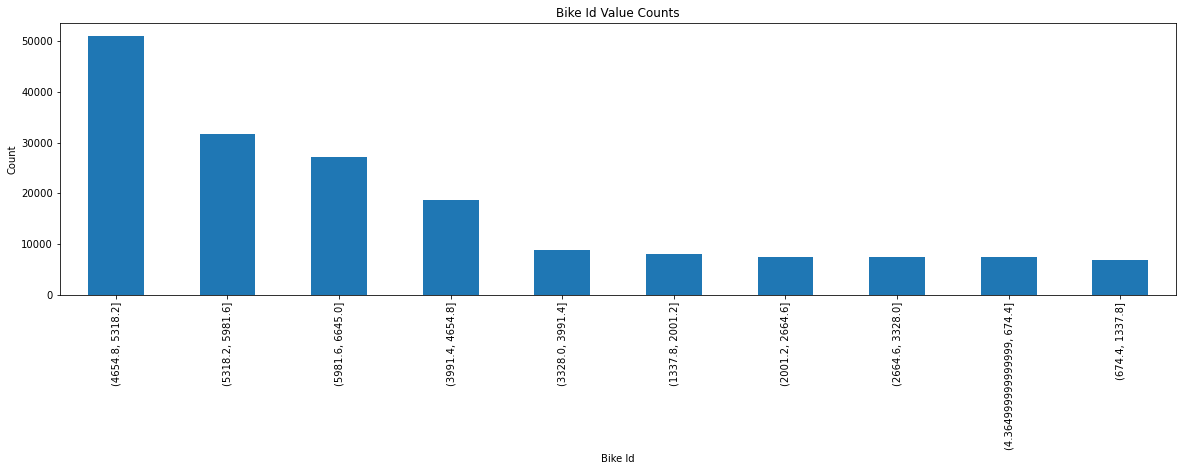

In [34]:
# Showing bike_id Value Counts.

plt.figure(figsize=[20, 5])
fgb.bike_id.value_counts(bins=10).plot(kind='bar');
plt.xlabel('Bike Id')
plt.ylabel('Count')
plt.title('Bike Id Value Counts');

<b>Observed:</b>

- Some bikes made 179 rides and others only made one.
- Most used bike_id is from 3991 to 6638.

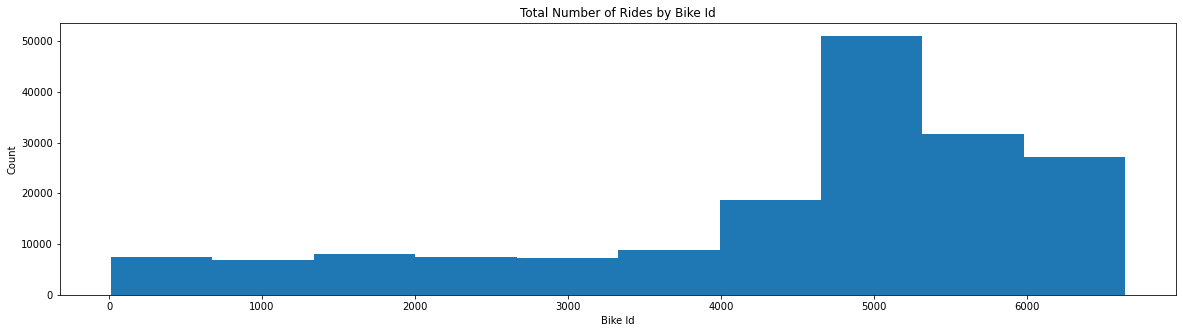

In [35]:
# Plotting total number of rides by bike_id.

plt.figure(figsize=[20, 5])
fgb.bike_id.plot(kind="hist");
plt.xlabel('Bike Id')
plt.ylabel('Count')
plt.title('Total Number of Rides by Bike Id');

<b>Observed:</b>

- The highest used bike_id in fgb is in the range from 4655 to 5318.
- The lowest used bike_id in fgb is in the range from 674 to 1338.

<b>Needs more investigation</b>

- The relation between "bike_id" and other variables in fgb.

In [36]:
# Ratio of rides taken by Subscribers.

len(fgb[fgb['user_type'] == 'Subscriber']) / len(fgb)

0.906332030399248

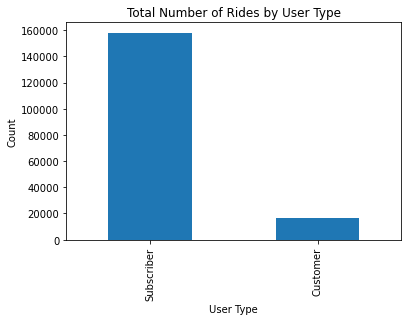

In [37]:
# Total number of rides categorized by user type.

fgb.user_type.value_counts().plot(kind = 'bar');
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Total Number of Rides by User Type');

<b>Observed:</b>

- 90% of rides is taken by subscribers.

In [38]:
fgb.member_age_2019.describe()

count    174478.000000
mean         34.194500
std          10.119272
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age_2019, dtype: float64

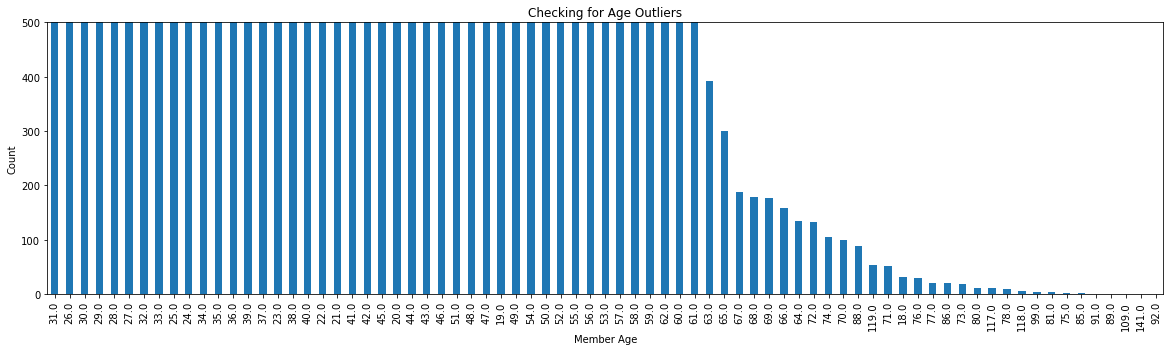

In [39]:
# Checking for age outliers.

plt.figure(figsize=[20, 5])
fgb.member_age_2019.value_counts().plot(kind = 'bar');
plt.ylim(0, 500)
plt.xlabel('Member Age')
plt.ylabel('Count')
plt.title('Checking for Age Outliers');

<b>Observed</b>

- We can remove rides taken by members ages greater than 85

In [40]:
# Removing rides taken by members ages greater than 85.

fgb = fgb.query('member_age_2019 < 85')
fgb.shape

(174289, 18)

In [41]:
# Member age describtive statistics.

fgb.member_age_2019.describe()

count    174289.000000
mean         34.123467
std           9.879442
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          81.000000
Name: member_age_2019, dtype: float64

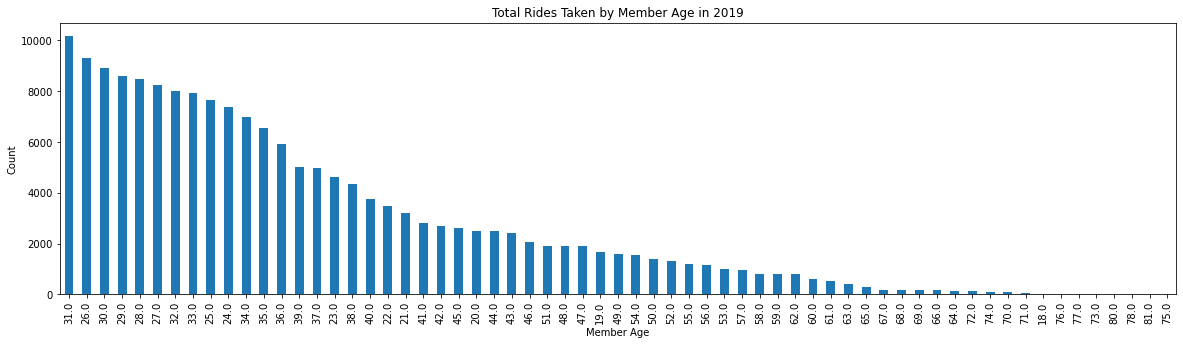

In [42]:
# Total rides taken by user age in 2019 after removing outliers.

plt.figure(figsize=[20, 5])
fgb.member_age_2019.value_counts().plot(kind = 'bar');
plt.xlabel('Member Age')
plt.ylabel('Count')
plt.title('Total Rides Taken by Member Age in 2019');

<b>Observed:</b>

- The minimum user age is 18 years, the maximum user age is 81 years.
- Most of the rides took place in the user age group between 24 and 31.
- Mostly, the older the member, the lower the total number of rides made.

<b>Needs more investigation</b>

- The relation between "member_age_2019" and other variables in fgb.

In [43]:
# Showing the member gender categories and their values.

fgb.member_gender.value_counts()

Male      130050
Female     40625
Other       3614
Name: member_gender, dtype: int64

<b>Observed:</b>

- There are three types in user gender.
- Male users are 75% of total users.

In [44]:
# Showing the ratio of each type of users Male, Female, and Other.

print(len(fgb[fgb['member_gender'] == 'Male']) / len(fgb))
print(len(fgb[fgb['member_gender'] == 'Female']) / len(fgb))
print(len(fgb[fgb['member_gender'] == 'Other']) / len(fgb))

0.7461744573667873
0.23308986797789877
0.020735674655313875


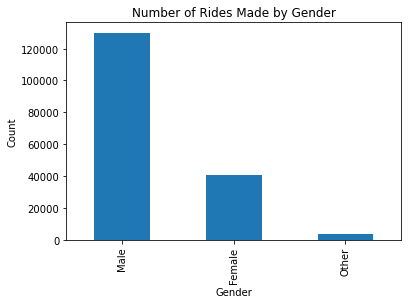

In [45]:
# Plotting the number of rides made by gender type.

fgb.member_gender.value_counts().plot(kind = 'bar');
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Rides Made by Gender');

<b>Observed:</b>

- Male users represents 75% of all users.
- Female users represents 23% of all users.
- Other represents only 2% of all users.

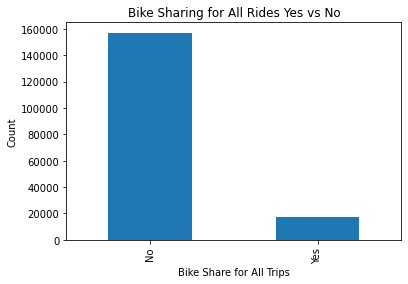

In [46]:
# Comparison chart between users who use bike sharing for all rides and users who don't.

fgb.bike_share_for_all_trip.value_counts().plot(kind = 'bar');
plt.xlabel('Bike Share for All Trips')
plt.ylabel('Count')
plt.title('Bike Sharing for All Rides Yes vs No');

<b>Observed:</b>

- Most rides are non-bike_share_for_all_trip members.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Removed outliers after Ride duration of 8000 seconds.
- The duration_sec beak between 261sec and 361sec.
- The duration_sec distribution looks unimodal.
- Duration in seconds has a long-tailed Right skewed distribution.
- Noticed that the max rides are done on Thursday.
- Min duration rides take place on Saturday and Sunday "weekend".
- The highest days in the total number of rides are 28, 20, 21, and 19 respectively.
- The lowest days in the total number of rides are 9, 3, 2, and 13 respectively.
- It was noted that the maximum rides take place at 5 pm and 8 am, respectively.
- Minimum rides from 1 am to 3 am.
- The highest starting station in the total number of rides are ["Market St at 10th St", "San Francisco Caltrain Station 2  (Townsend St at 4th St)", "Berry St at 4th St"].
- The highest ending station in the total number of rides are ["San Francisco Caltrain Station 2  (Townsend St at 4th St)", "Market St at 10th St", "Montgomery St BART Station (Market St at 2nd St)"].
- The lowest 3 starting stations in the total number of rides are ["21st Ave at International Blvd", "Palm St at Willow St", 
"16th St Depot".
- The lowest 3 ending stations in the total number of rides are ["21st Ave at International Blvd", "16th St Depot", 
"Willow St at Vine St"].
- The highest used bike_id in fgb is in the range from 4655 to 5318.
- The lowest used bike_id in fgb is in the range from 674 to 1338.
- 90% of rides are taken by subscribers.
- Removed outliers for rides taken by members ages greater than 85.
- The minimum user age is 18 years, the maximum user age is 81 years after removing outliers.
- Most of the rides took place in the user age group between 24 and 31.
- Mostly, the older the member, the lower the total number of rides made.
- There are three types in user gender.
- Male users represent 75% of all users.
- Female users represent 23% of all users.
- Other represents only 2% of all users.
- Most rides are non-bike_share_for_all_trip members.


<b>Needs more investigation</b>

- The total count of rides where gender is "Male", bike share is "No", and user type is "Subscriber" is 105903, which is more than half of the data.
- The relation between "duration_sec", "bike_id", and "member_age_2019" against other variables in fgb.
- Some bikes made 179 rides and others only made one.
- The beak hours and beak days.
- The stations with min and max rides.
- The relation between sthour and enhour.
- The relation between "member_gender", "user_type", and "bike_share_for_all_trip" against other variables in fgb.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Converting the (start_time, end_time) columns from object to datetime using the to_datetime() method.
- Convert user_type, member_gender, bike_share_for_all_trip, stday_name, enday_name into ordered categorical types.
- Creating a new column for the members' age in 2019.
- Dropping the columns ('member_birth_year', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude').
- When investigating the "duration_sec" variable, a number of outlier points were identified "Ride duration of 8000 seconds". For safety, all of these points were removed from the dataset to move forwards.
- When investigating the "member_age_2019" variable, a number of outlier points were identified "Rides taken by members ages greater than 85". For safety, all of these points were removed from the dataset to move forwards.
- Creating a sample of 500 rides so that plots are clearer and they render faster.

## Bivariate Exploration


To start off with, I want to look at the pairwise correlations present between features in the data.

In [47]:
num_vars = ['duration_sec', 'member_age_2019', 'stday_num', 'enday_num', 'sthour', 'enhour', 
            'start_station_id', 'end_station_id', 'bike_id']


#cat_vars = ['start_station_name', 'end_station_name', 'user_type', 'member_gender', 'bike_share_for_all_trip']

cat_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

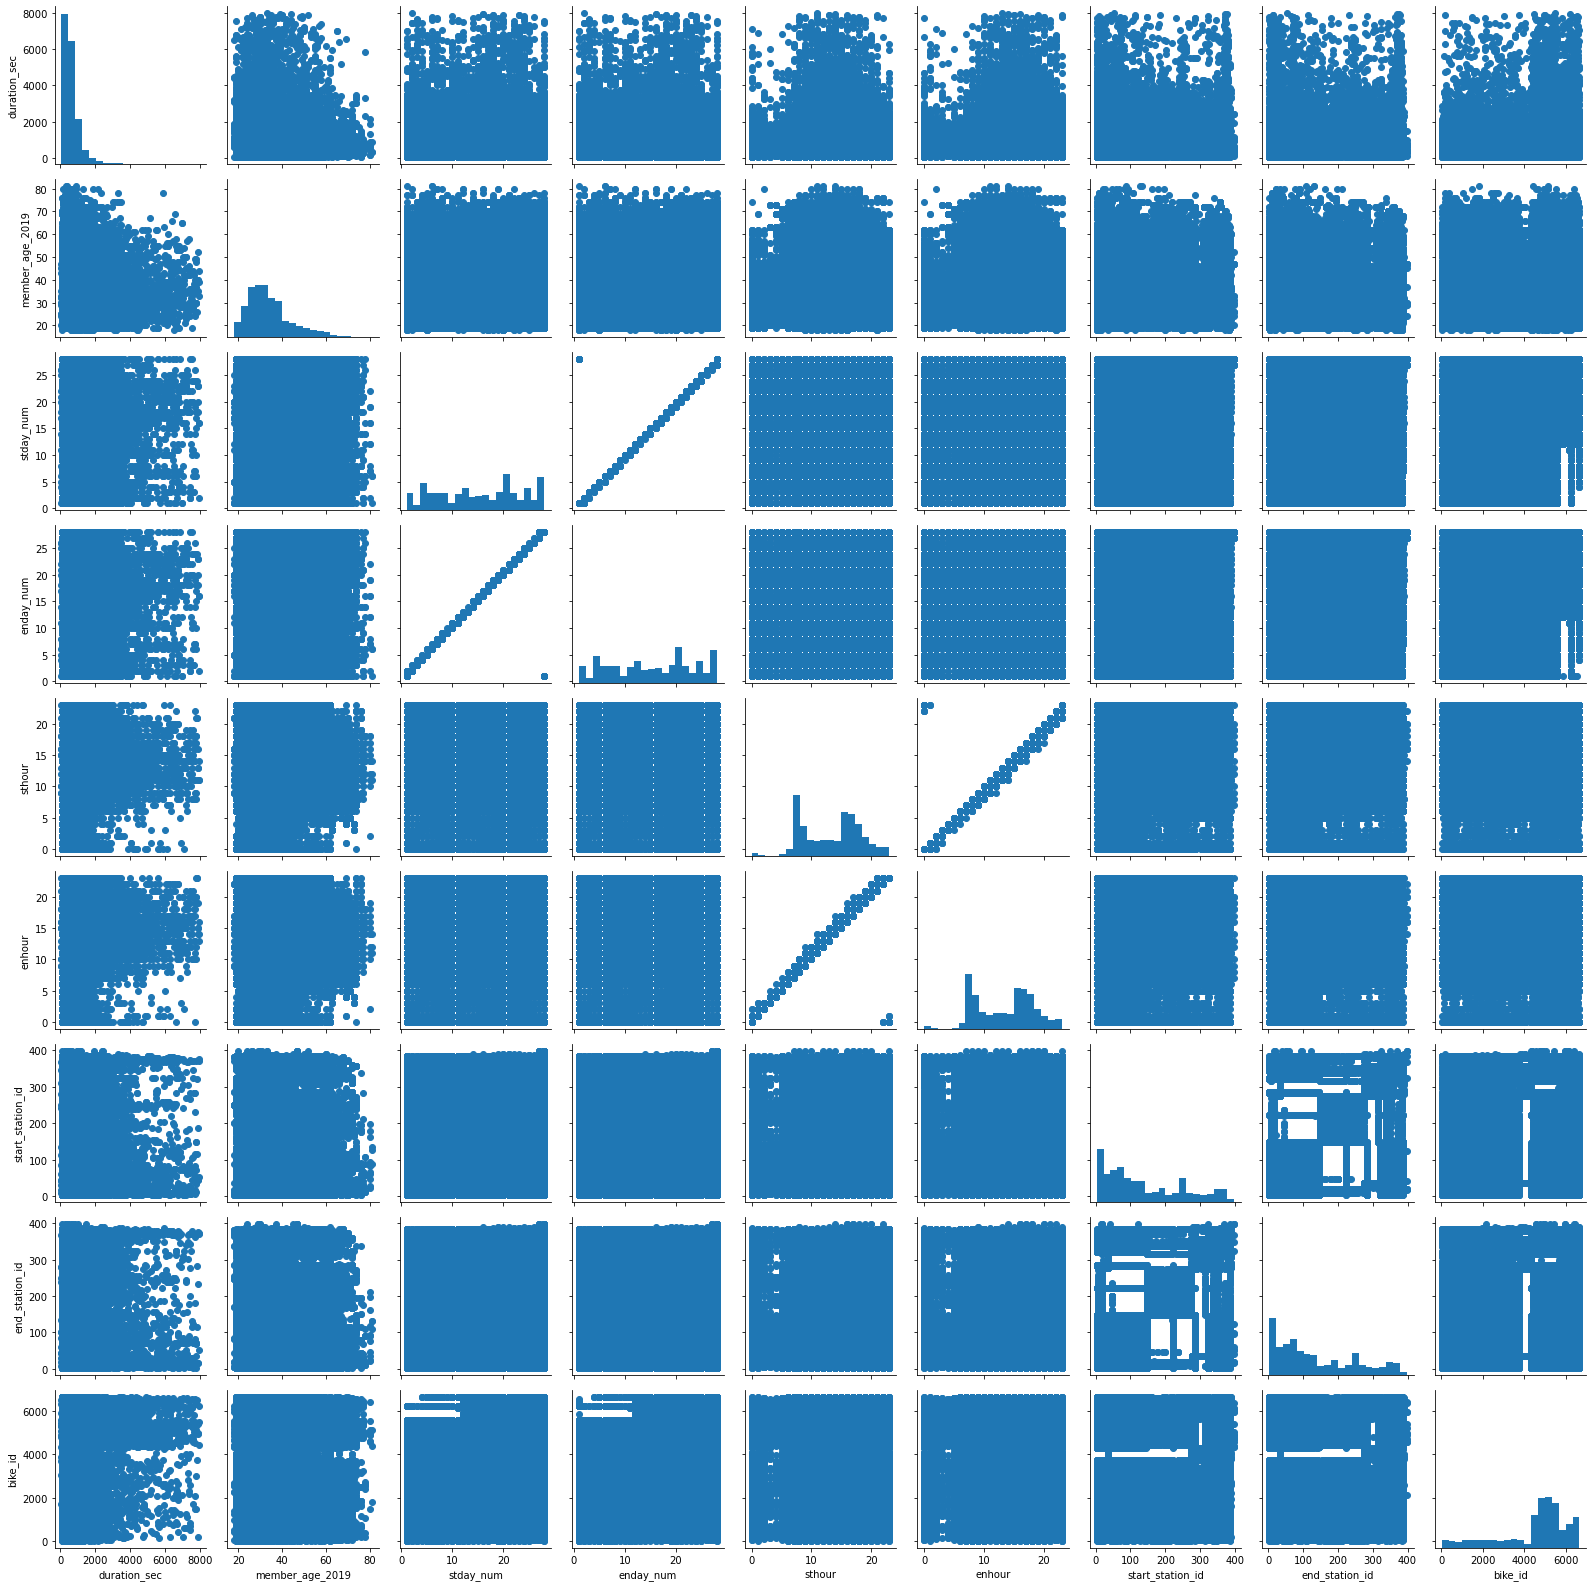

In [48]:
# I want to look at the pairwise correlations present between features in the data.

g = sb.PairGrid(data = fgb, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

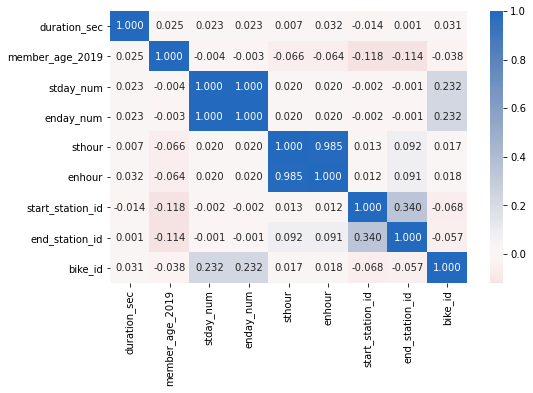

In [49]:
# Correlation plot

plt.figure(figsize = [8, 5])
sb.heatmap(fgb[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

<b>Observed</b>:

- As expected, enhour is highly correlated with sthour.
- The plot shows that mostly there is no relation between ride "duration_sec" and "member_age_2019". 
- There is a possibly moderate relation between "star_station_id" and "end_station_id".
- There is a weak relation between ("stday_num", "enday_num") and ("bike_id").
- All other variables don't have noticeable correlations with any other numeric variables in the dataset.

<b>Plan on investigating next:</b>

- Let's move on to looking at how star_station_id, end_station_id, sthour, enhour, stday_num, enday_num, and bike_id correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

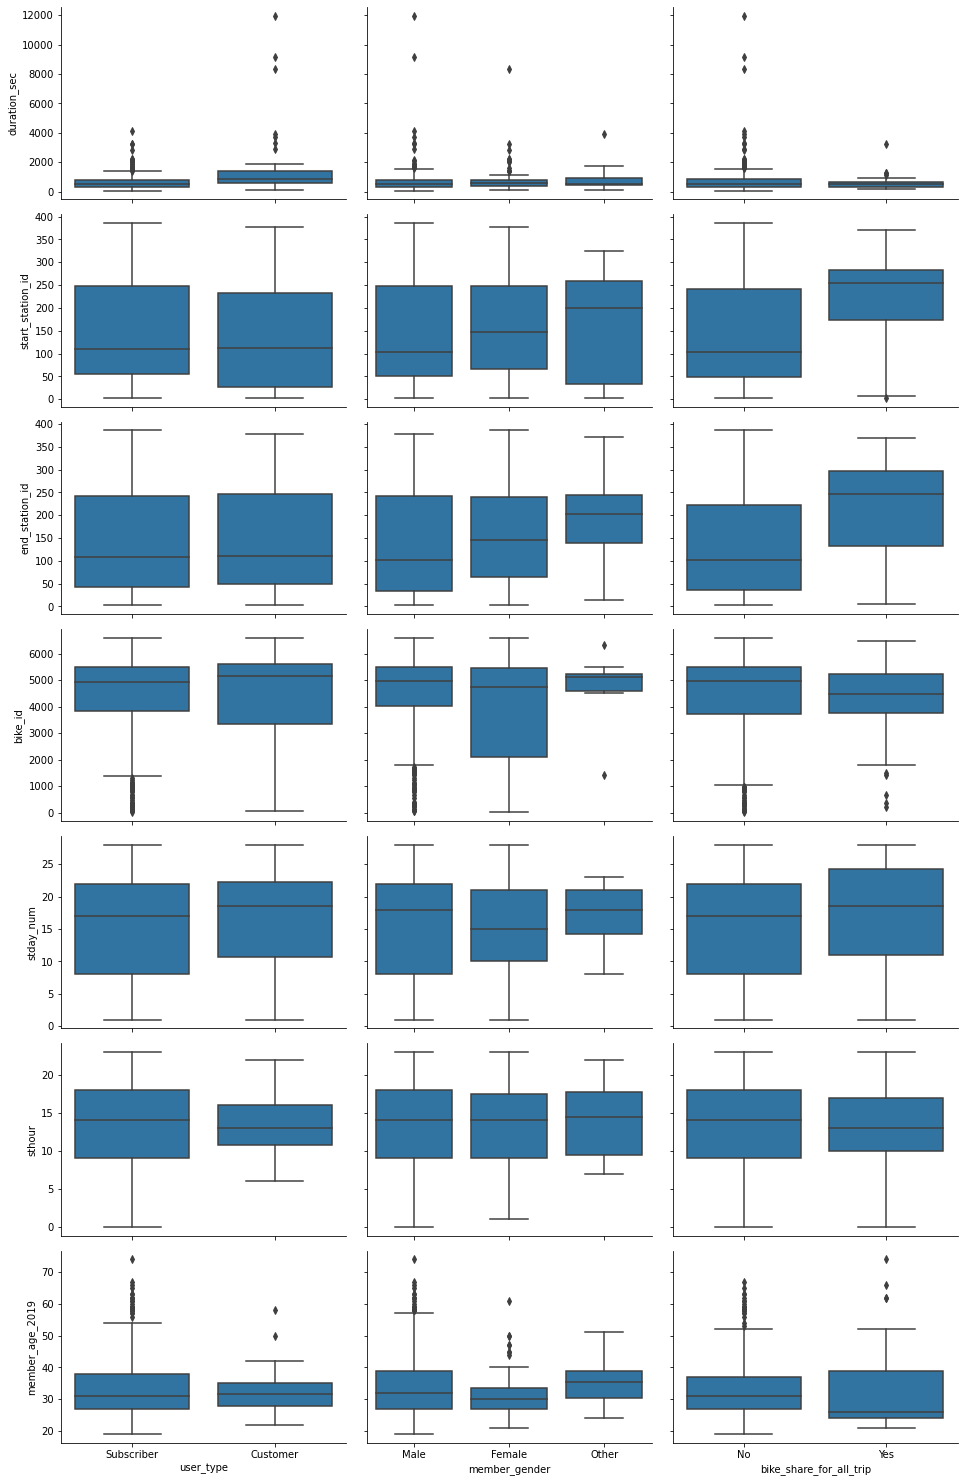

In [50]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

y_vars=['duration_sec', 'start_station_id', 'end_station_id', 'bike_id', 'stday_num', 'sthour', 'member_age_2019']
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data=fgb_samp, y_vars=y_vars, x_vars=cat_vars, height =3, aspect =1.5);
g.map(boxgrid);
plt.show();

<b>Observed</b>

- "duration_sec" median and frequency for Customer is higher than Subscriber.
- "bike_id" median for Other higher than median for Female and median for Female higher than median for Male.

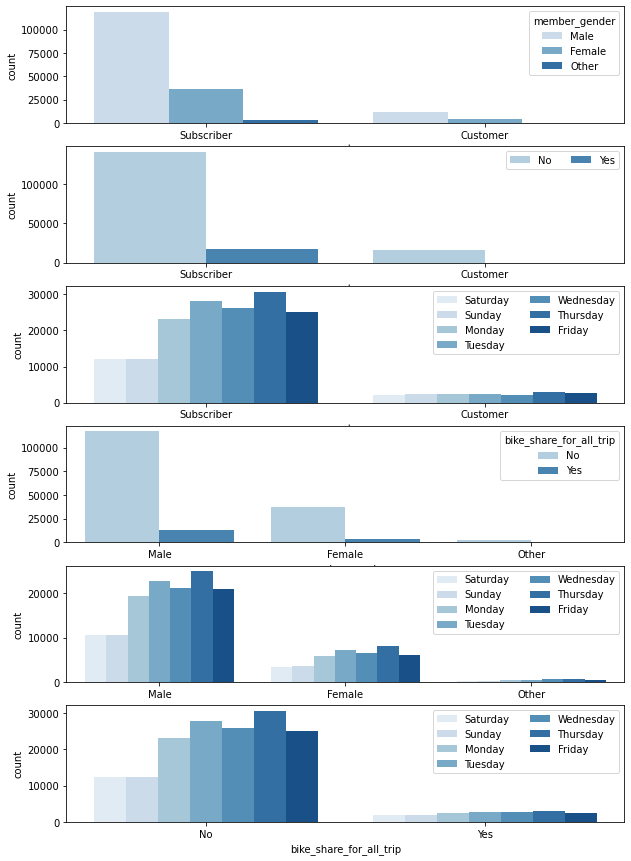

In [51]:
# Finally, let's look at relationships between the four categorical features.

plt.figure(figsize = [10, 15])

# subplot 1: 'user_type' vs 'member_gender'
plt.subplot(6, 1, 1)
sb.countplot(data = fgb, x = 'user_type', hue = 'member_gender', palette = 'Blues')

# subplot 2: 'user_type' vs. 'bike_share_for_all_trip'
ax = plt.subplot(6, 1, 2)
sb.countplot(data = fgb, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Blues')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 3: 'user_type' vs. 'stday_name'
ax = plt.subplot(6, 1, 3)
sb.countplot(data = fgb, x = 'user_type', hue = 'stday_name', palette = 'Blues')
ax.legend(loc = 1, ncol = 2)

# subplot 4: 'member_gender' vs 'bike_share_for_all_trip'
plt.subplot(6, 1, 4)
sb.countplot(data = fgb, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Blues')

# subplot 5: 'member_gender' vs. 'stday_name'
ax = plt.subplot(6, 1, 5)
sb.countplot(data = fgb, x = 'member_gender', hue = 'stday_name', palette = 'Blues')
ax.legend(ncol = 2) 

# subplot 6: 'bike_share_for_all_trip' vs. 'stday_name'
ax = plt.subplot(6, 1, 6)
sb.countplot(data = fgb, x = 'bike_share_for_all_trip', hue = 'stday_name', palette = 'Blues')
ax.legend(loc = 1, ncol = 2)


plt.show()

<b>Observed</b>

-There doesn't seem to be that much interaction between the categories variables above, though proportionally it seems like there might be more rides for Males, Subscribers, No bike_share_for_all_trip users.


With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how 'bike_id' and ('stday_num', 'enday_num') are related to one another for all of the data.

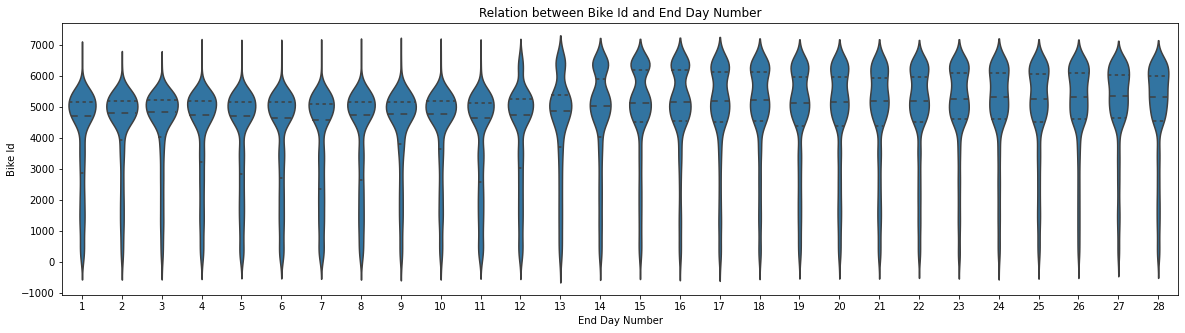

In [52]:
# Showing how 'bike_id' and 'enday_num' are related to one another for all of the data.

plt.figure(figsize=[20, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data=fgb, y='bike_id', x='enday_num', inner='quartile', color=base_color);
plt.xlabel('End Day Number')
plt.ylabel('Bike Id')
plt.title('Relation between Bike Id and End Day Number');

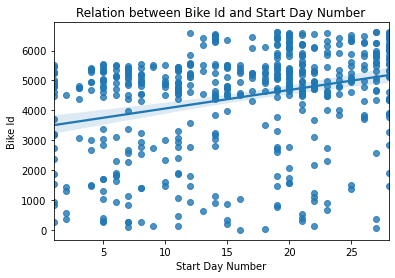

In [53]:
# Showing how 'bike_id' and 'stday_num' are related to one another for a data sample.

sb.regplot(data=fgb_samp, y='bike_id', x='stday_num');
plt.xlabel('Start Day Number')
plt.ylabel('Bike Id')
plt.title('Relation between Bike Id and Start Day Number');

<b>Observed</b>

- From day 15 to 28 the median bike_id is almost the same.
- The most high bike_ids are used from day 15 to 28.
- Most used bike_ids is from 3991 to 6638.

In [54]:
bins = np.arange(0, 6100, 100)
g = sb.FacetGrid(data=fgb_samp, col= 'start_station_name', col_wrap=3, height=5, aspect=2);
g.map_dataframe(sb.histplot, x=fgb.bike_id, bins=bins);
g.set_xlabels('Bike Id')
g.set_ylabels('Count');

<b>Observed</b>:

- No bike_ids specified by Station name.

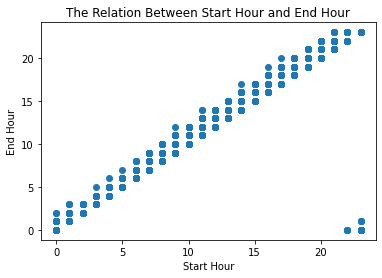

In [55]:
# Showing how 'sthour' and 'enhour' are related to one another for all of the data.

plt.scatter(data=fgb, x='sthour', y='enhour');
plt.xlabel('Start Hour')
plt.ylabel('End Hour')
plt.title('The Relation Between Start Hour and End Hour');

<b>Observed</b>

- As expected positive high correlation between 'sthour' and 'enhour'.

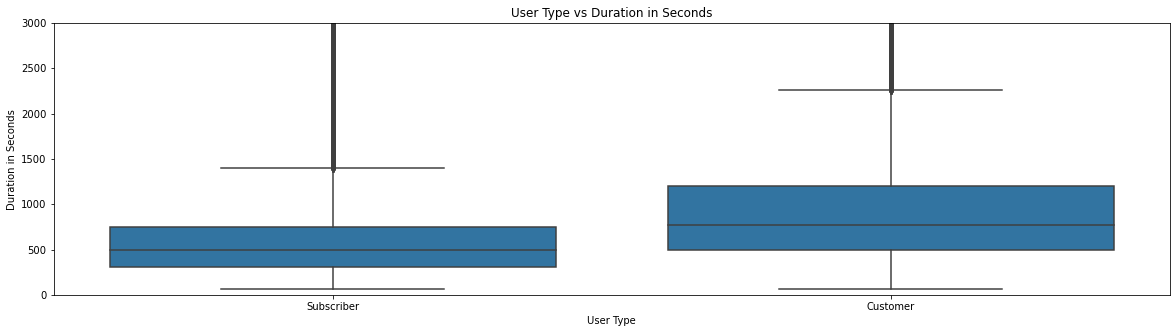

In [56]:
plt.figure(figsize=[20, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=fgb, x='user_type', y='duration_sec', color=base_color);
#plt.xticks(rotation=90);
plt.ylim(0, 3000);
plt.xlabel('User Type')
plt.ylabel('Duration in Seconds')
plt.title('User Type vs Duration in Seconds');

<b>Observed</b>:

- The 'Customer' user type median ride duration is higher than the 'Subscriber' user type and with higher frequency.

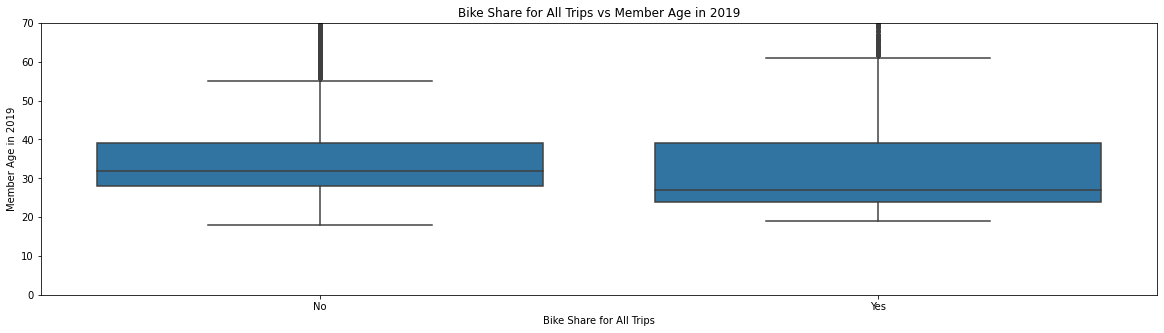

In [57]:
# Bike Share for All Trips vs Member Age in 2019.

plt.figure(figsize=[20, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=fgb, x='bike_share_for_all_trip', y='member_age_2019', color=base_color);
plt.ylim(0, 70);
plt.xlabel('Bike Share for All Trips')
plt.ylabel('Member Age in 2019')
plt.title('Bike Share for All Trips vs Member Age in 2019');

<b>Observed</b>:

- Noticeable high frequency in ages for users who use bike share for all trip with low median age.
- Noticeable low frequency in ages for users who don't use bike share for all trip with high median age.

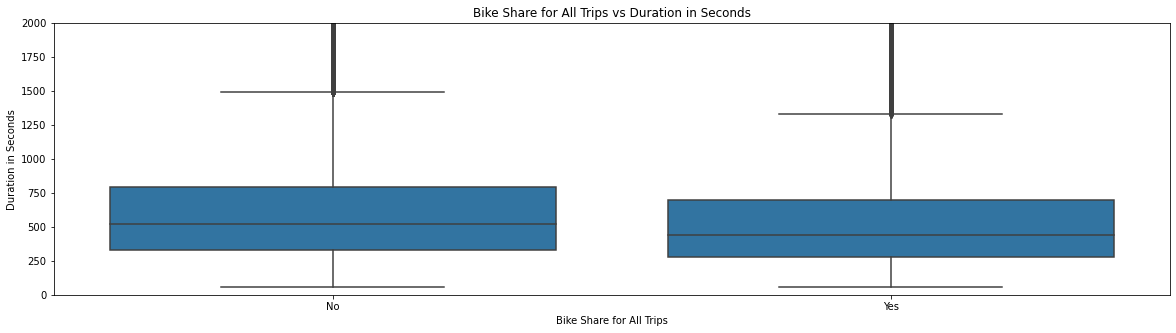

In [58]:
# Bike Share for All Trips vs Duration in Seconds.

plt.figure(figsize=[20, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=fgb, x='bike_share_for_all_trip', y='duration_sec', color=base_color);
plt.ylim(0, 2000);
plt.xlabel('Bike Share for All Trips')
plt.ylabel('Duration in Seconds')
plt.title('Bike Share for All Trips vs Duration in Seconds');

<b>Observed</b>:

- Noticeable higher ride duration for non bike share for all rides users.
- High median for non bike share for all rides users.

In [59]:
# Preparing the data for Creating a Heatmap of start_station_name vs user_type.

counts = fgb.groupby(['start_station_name', 'user_type']).size().reset_index(name = 'count')
counts = counts.pivot(index= 'start_station_name', columns= 'user_type', values= 'count')


counts_subscriber = counts.sort_values('Subscriber', ascending=False).iloc[:10]
counts_customer = counts.sort_values('Customer', ascending=False).iloc[:10]

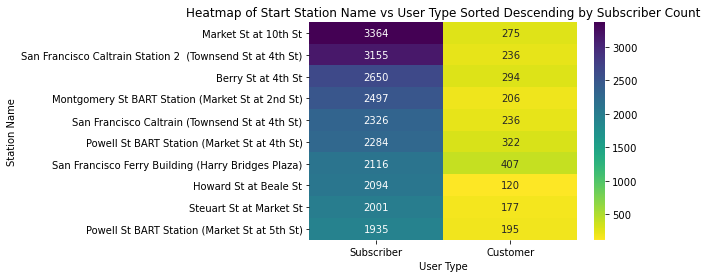

In [60]:
# Creating Heatmap of start_station_name vs user_type.

sb.heatmap(counts_subscriber, annot=True, fmt='d', cmap='viridis_r');
plt.xlabel('User Type')
plt.ylabel('Station Name')
plt.title('Heatmap of Start Station Name vs User Type Sorted Descending by Subscriber Count');

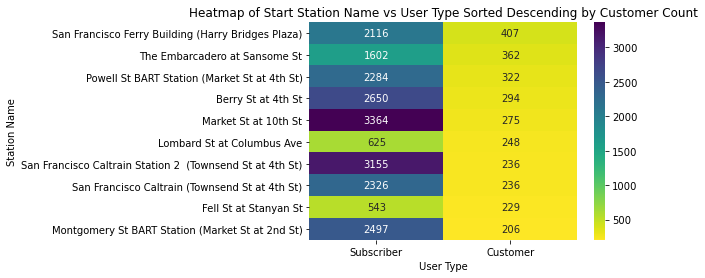

In [61]:
# Creating Heatmap of start_station_name vs user_type.

sb.heatmap(counts_customer, annot=True, fmt='d', cmap='viridis_r');
plt.xlabel('User Type')
plt.ylabel('Station Name')
plt.title('Heatmap of Start Station Name vs User Type Sorted Descending by Customer Count');

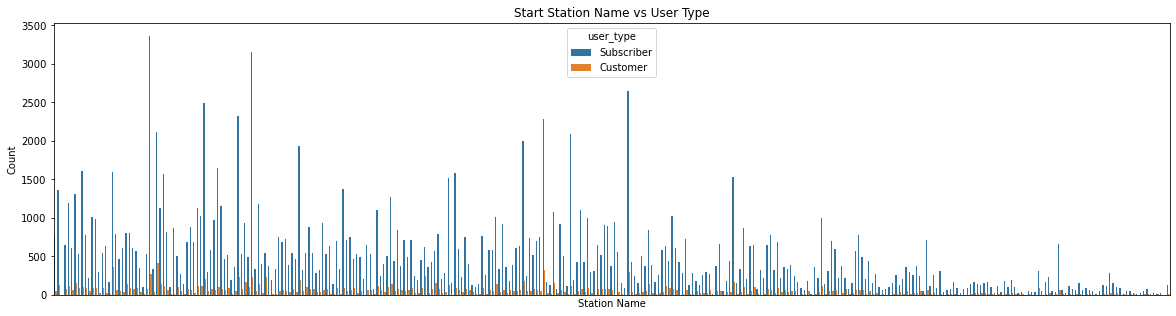

In [62]:
# Showing the relationship between start station name and the count of user types (Customer, Subscriber). 

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='start_station_name', hue='user_type');
plt.xticks([]);
plt.ylabel('Count')
plt.xlabel('Station Name')
plt.title('Start Station Name vs User Type');

<b>Observed</b>:

- Noticed that the Subscriber user type counts is much higher than the Customer user type counts in all stations.
- The highest Subcriber user type count is 3369.0 in the Market St at 10th St station.
- The highest Customer user type count is 417.0 in the San Francisco Ferry Building (Harry Bridges Plaza) station.

In [63]:
# Preparing the data for Creating a Heatmap of start_station_name vs member_gender.

counts_gender = fgb.groupby(['start_station_name', 'member_gender']).size().reset_index(name = 'count')
counts_gender = counts_gender.pivot(index= 'start_station_name', columns= 'member_gender', values= 'count')

counts_male = counts_gender.sort_values('Male', ascending=False).iloc[:10]
counts_female = counts_gender.sort_values('Female', ascending=False).iloc[:10]
counts_other = counts_gender.sort_values('Other', ascending=False).iloc[:10]

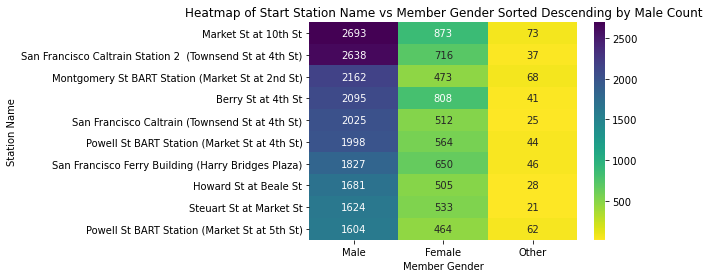

In [64]:
# Creating Heatmap of start_station_name vs member_gender.

sb.heatmap(counts_male, annot=True, fmt='d', cmap='viridis_r');
plt.xlabel('Member Gender')
plt.ylabel('Station Name')
plt.title('Heatmap of Start Station Name vs Member Gender Sorted Descending by Male Count');

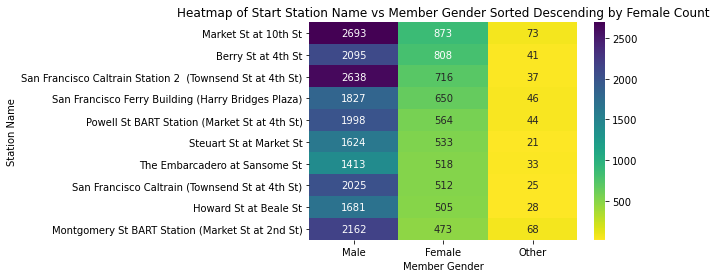

In [65]:
# Creating Heatmap of start_station_name vs member_gender.

sb.heatmap(counts_female, annot=True, fmt='d', cmap='viridis_r');
plt.xlabel('Member Gender')
plt.ylabel('Station Name')
plt.title('Heatmap of Start Station Name vs Member Gender Sorted Descending by Female Count');

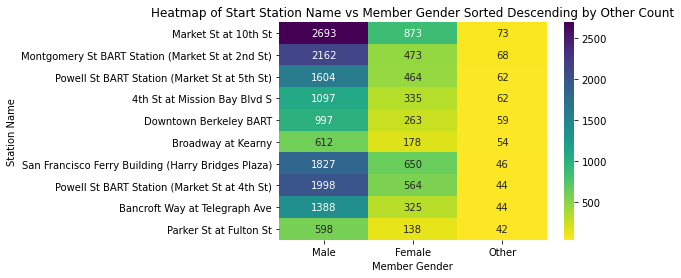

In [66]:
# Creating Heatmap of start_station_name vs member_gender.

sb.heatmap(counts_other, annot=True, fmt='d', cmap='viridis_r');
plt.xlabel('Member Gender')
plt.ylabel('Station Name')
plt.title('Heatmap of Start Station Name vs Member Gender Sorted Descending by Other Count');

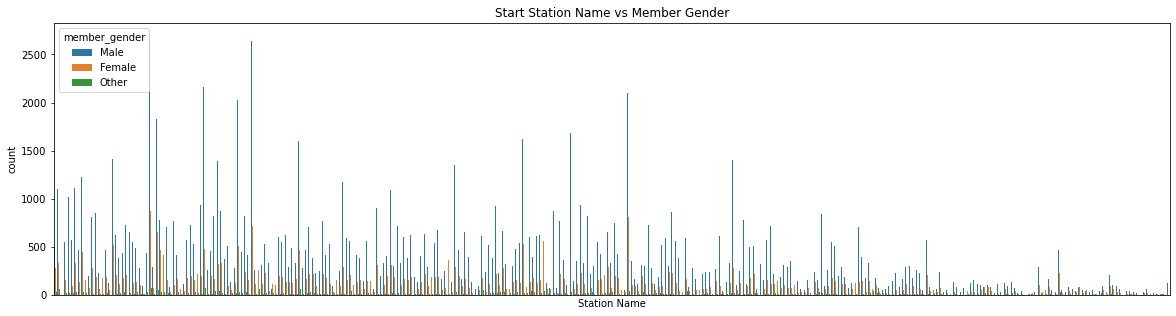

In [67]:
# start_station_name vs member_gender.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='start_station_name', hue='member_gender');
plt.xticks([]);
plt.xlabel('Count')
plt.xlabel('Station Name')
plt.title('Start Station Name vs Member Gender');

<b>Observed</b>:

- Noticed that the max three values for Male, Female, and Other (2693, 873, 73) are all in the same station "Market St at 10th St".
- Three station made less that 5 rides.
- The min Male count is two in the 16th St Depot station.
- The min Female count is one in many stations.
- The min Other count is NaN in many stations.

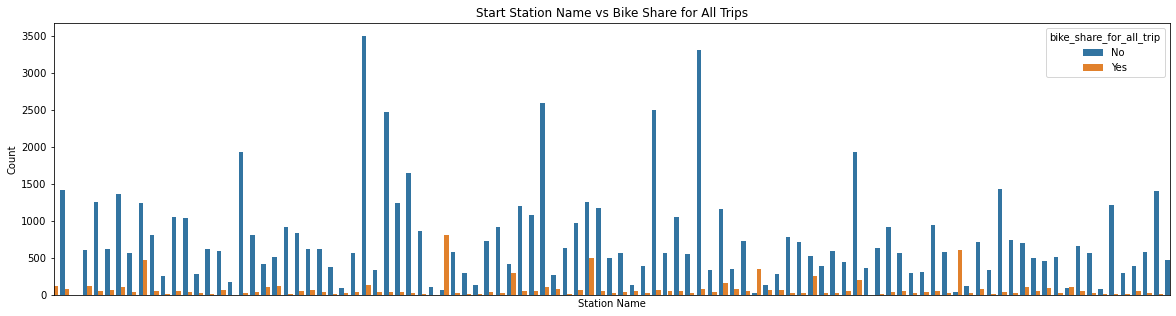

In [68]:
# The relation between start_station_name and bike_share_for_all_trip.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='start_station_name', hue='bike_share_for_all_trip');
plt.xticks([]);
plt.xlim(0, 100);
plt.xlabel('Station Name')
plt.ylabel('Count')
plt.title('Start Station Name vs Bike Share for All Trips');

<b>Observed</b>:

- Most rides in all stations are with No "bike share for all trip".

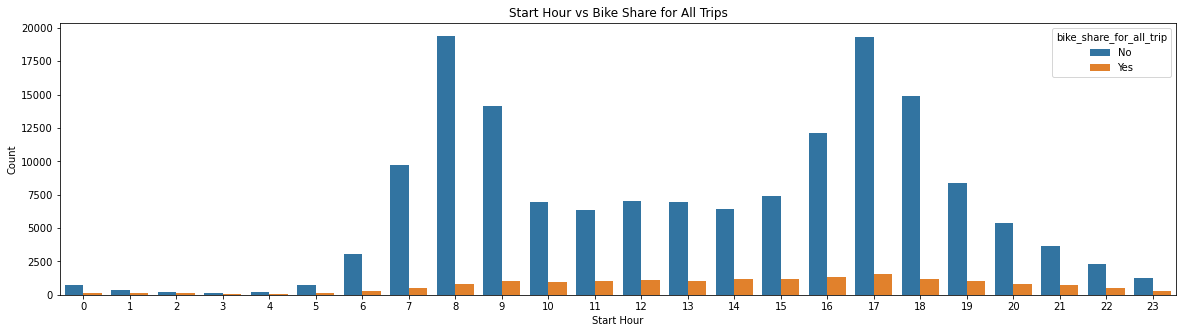

In [69]:
# The relation between sthour and bike_share_for_all_trip.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='sthour', hue='bike_share_for_all_trip');
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.title('Start Hour vs Bike Share for All Trips');

<b>Observed</b>:

- Two beaks for No "bike share for all trip" in the hours 8, 17 (Bimodal shape).

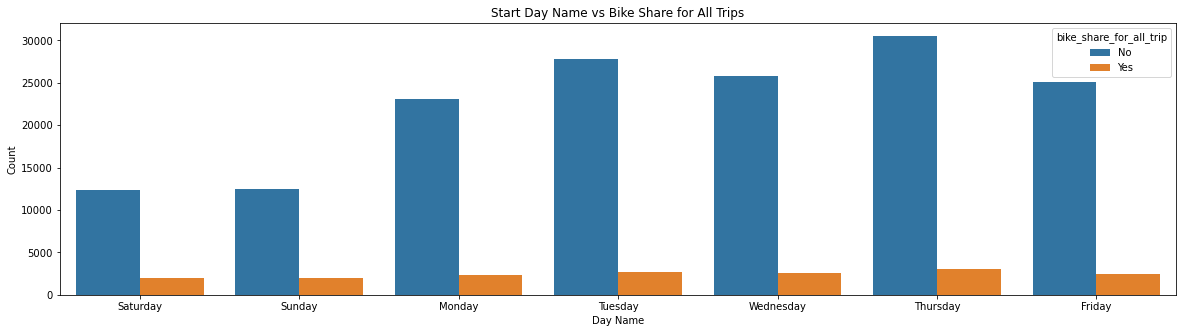

In [70]:
# The relation between stday_name and bike_share_for_all_trip.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='stday_name', hue='bike_share_for_all_trip');
plt.xlabel('Day Name')
plt.ylabel('Count')
plt.title('Start Day Name vs Bike Share for All Trips');

<b>Observed</b>:

- Noticed that Yes "bike share for all trip" users count is almost the same in all days of the week with small difference in weekends.
- Noticed that No "bike share for all trip" users smallest count is in weekends.
- Noticed that No "bike share for all trip" users count beak is in Thursday.

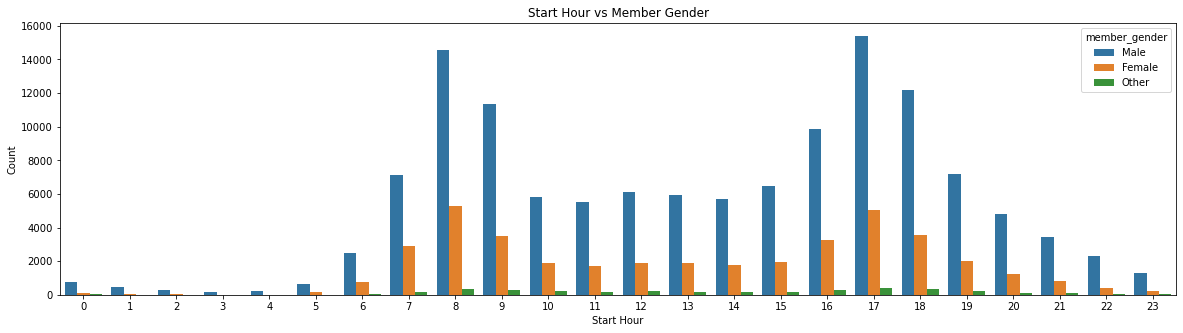

In [71]:
# The relation between sthour and member_gender.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='sthour', hue='member_gender');
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.title('Start Hour vs Member Gender');

<b>Observed</b>:

- "Bimodal shape" Two beaks for Male, Female, and Other "member_gender" in the hours 8, 17.

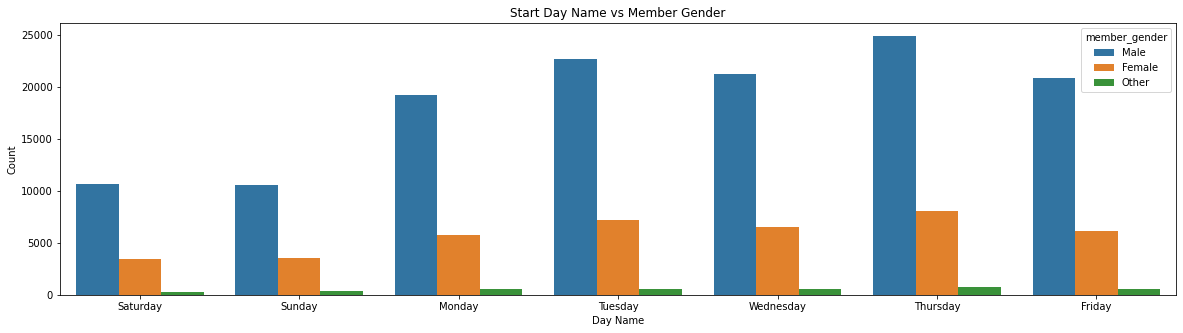

In [72]:
# The relation between stday_name and member_gender.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='stday_name', hue='member_gender');
plt.xlabel('Day Name')
plt.ylabel('Count')
plt.title('Start Day Name vs Member Gender');

<b>Observed</b>:

- Noticed that "member_gender" Other type count is almost the same in all days of the week with small decrease in weekends.
- Noticed that "member_gender" types smallest count is in weekends.
- Noticed that "member_gender" types count beak is in Thursday.

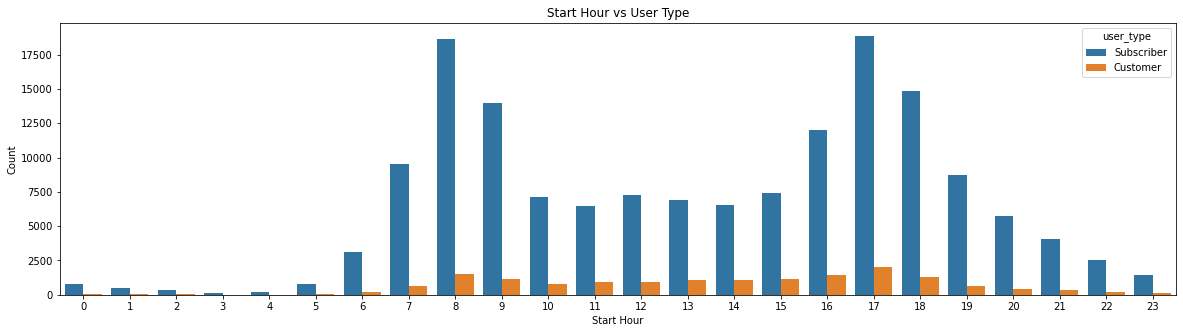

In [73]:
# The relation between sthour and user_type.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='sthour', hue='user_type');
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.title('Start Hour vs User Type');

<b>Observed</b>:

- "Bimodal shape" Two beaks for Subscriber and Customer "user_type" in the hours 8, 17 

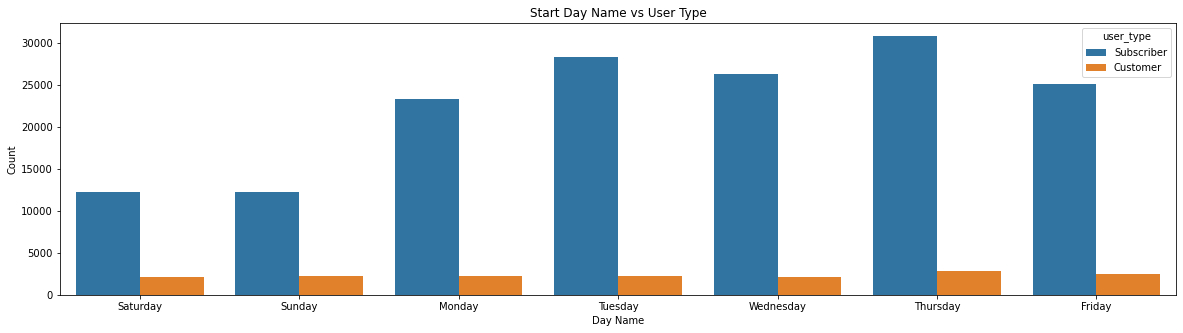

In [74]:
# The relation between stday_name and user_type.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='stday_name', hue='user_type');
plt.xlabel('Day Name')
plt.ylabel('Count')
plt.title('Start Day Name vs User Type');

<b>Observed</b>:

- Noticed that "user_type" Customer type count is almost the same in all days of the week with small decrease in weekends.
- Noticed that "user_type" types smallest count is in weekends.
- Noticed that (observed) "user_type" types count beak is in Thursday.

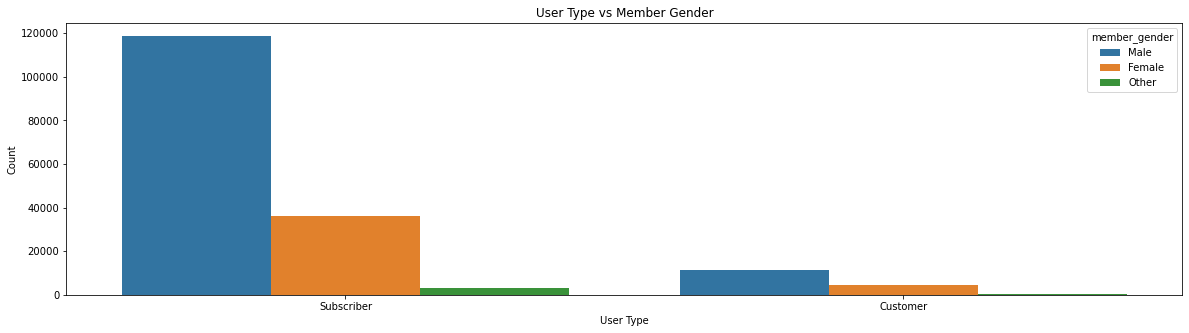

In [75]:
# The relation between user_type and member_gender.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='user_type', hue='member_gender');
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('User Type vs Member Gender');

<b>Observed</b>:

- Noticed that "user_type" Customer count is samller in all "member_gender" types than Subscriber.
- Noticed that "user_type" Subscriber count is larger in all "member_gender" types than Customer.
- Noticed that "member_gender" Male has the highest count in both "user_type" types.
- Noticed that "member_gender" Other has the lowest count in both "user_type" types.

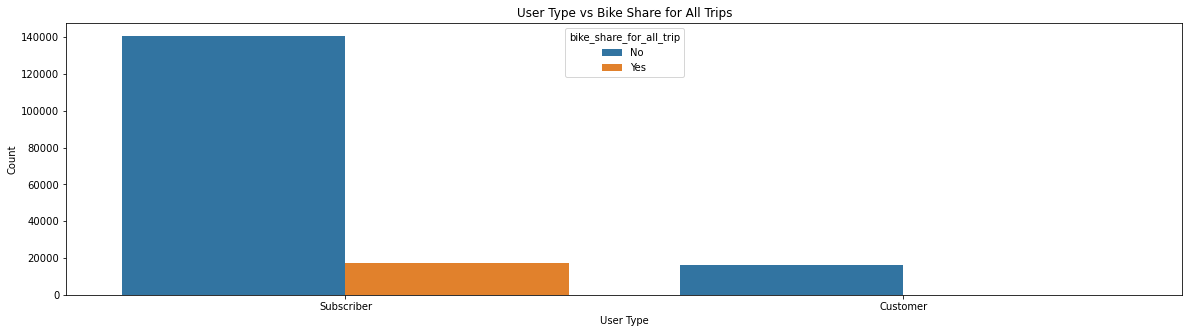

In [76]:
# The relation between user_type and bike_share_for_all_trip.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='user_type', hue='bike_share_for_all_trip');
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('User Type vs Bike Share for All Trips');

<b>Observed</b>:

- Noticed that (No "bike_share_for_all_trip") count for "user_type" Subscriber is larger than Customer.
- Noticed that (No "bike_share_for_all_trip") count for "user_type" Subscriber is larger than Customer.
- Only "user_type" Subscriber has "bike_share_for_all_trip".

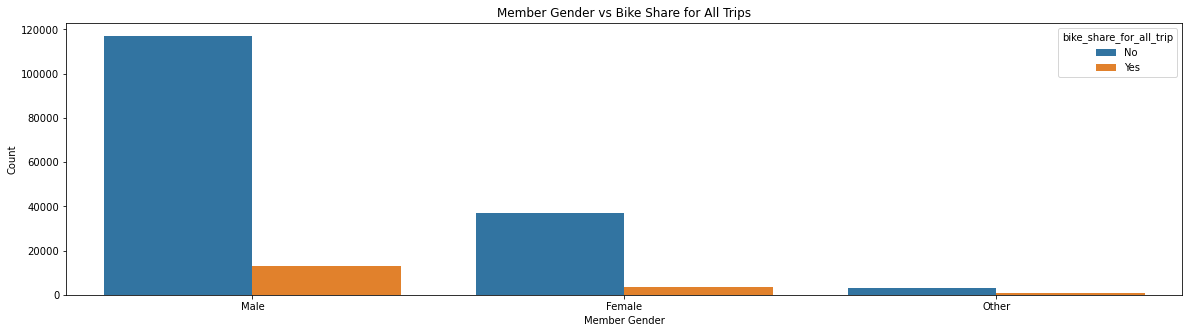

In [77]:
# The relation between member_gender and bike_share_for_all_trip.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='member_gender', hue='bike_share_for_all_trip');
plt.xlabel('Member Gender')
plt.ylabel('Count')
plt.title('Member Gender vs Bike Share for All Trips');

<b>Observed</b>:

- Male has the largest count in both types of 'bike_share_for_all_trip' types.
- 'bike_share_for_all_trip' No count is larger than the Yes count.
- Other has the smallest count in both types of 'bike_share_for_all_trip' types.

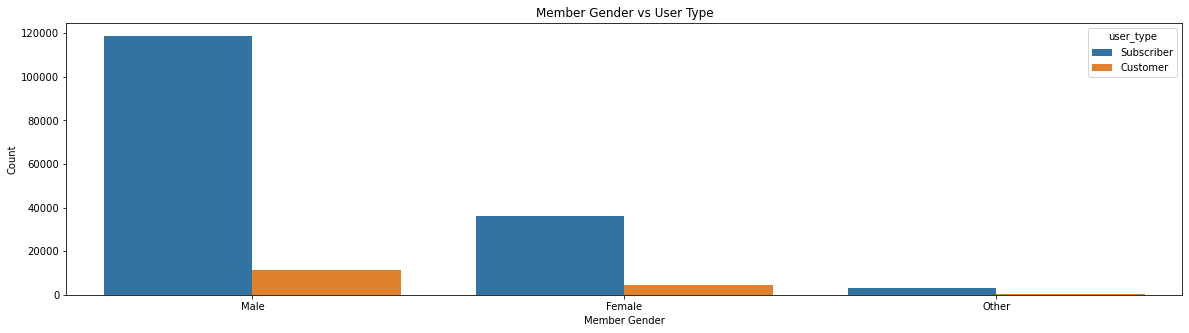

In [78]:
# The relation between member_gender and user_type.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='member_gender', hue='user_type');
plt.xlabel('Member Gender')
plt.ylabel('Count')
plt.title('Member Gender vs User Type');

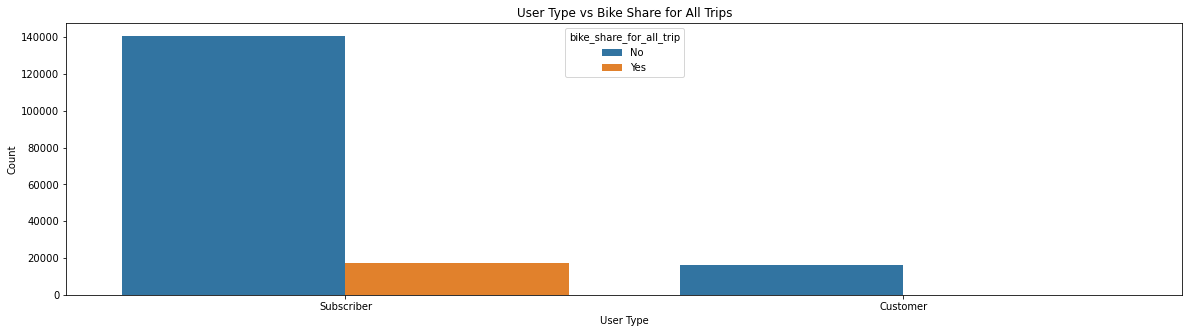

In [79]:
# The relation between user_type and bike_share_for_all_trip.

plt.figure(figsize= [20, 5])
sb.countplot(data=fgb, x='user_type', hue='bike_share_for_all_trip');
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('User Type vs Bike Share for All Trips');

<b>Observed</b>

- user type "Customer" don't have "bike_share_for_all_trip".

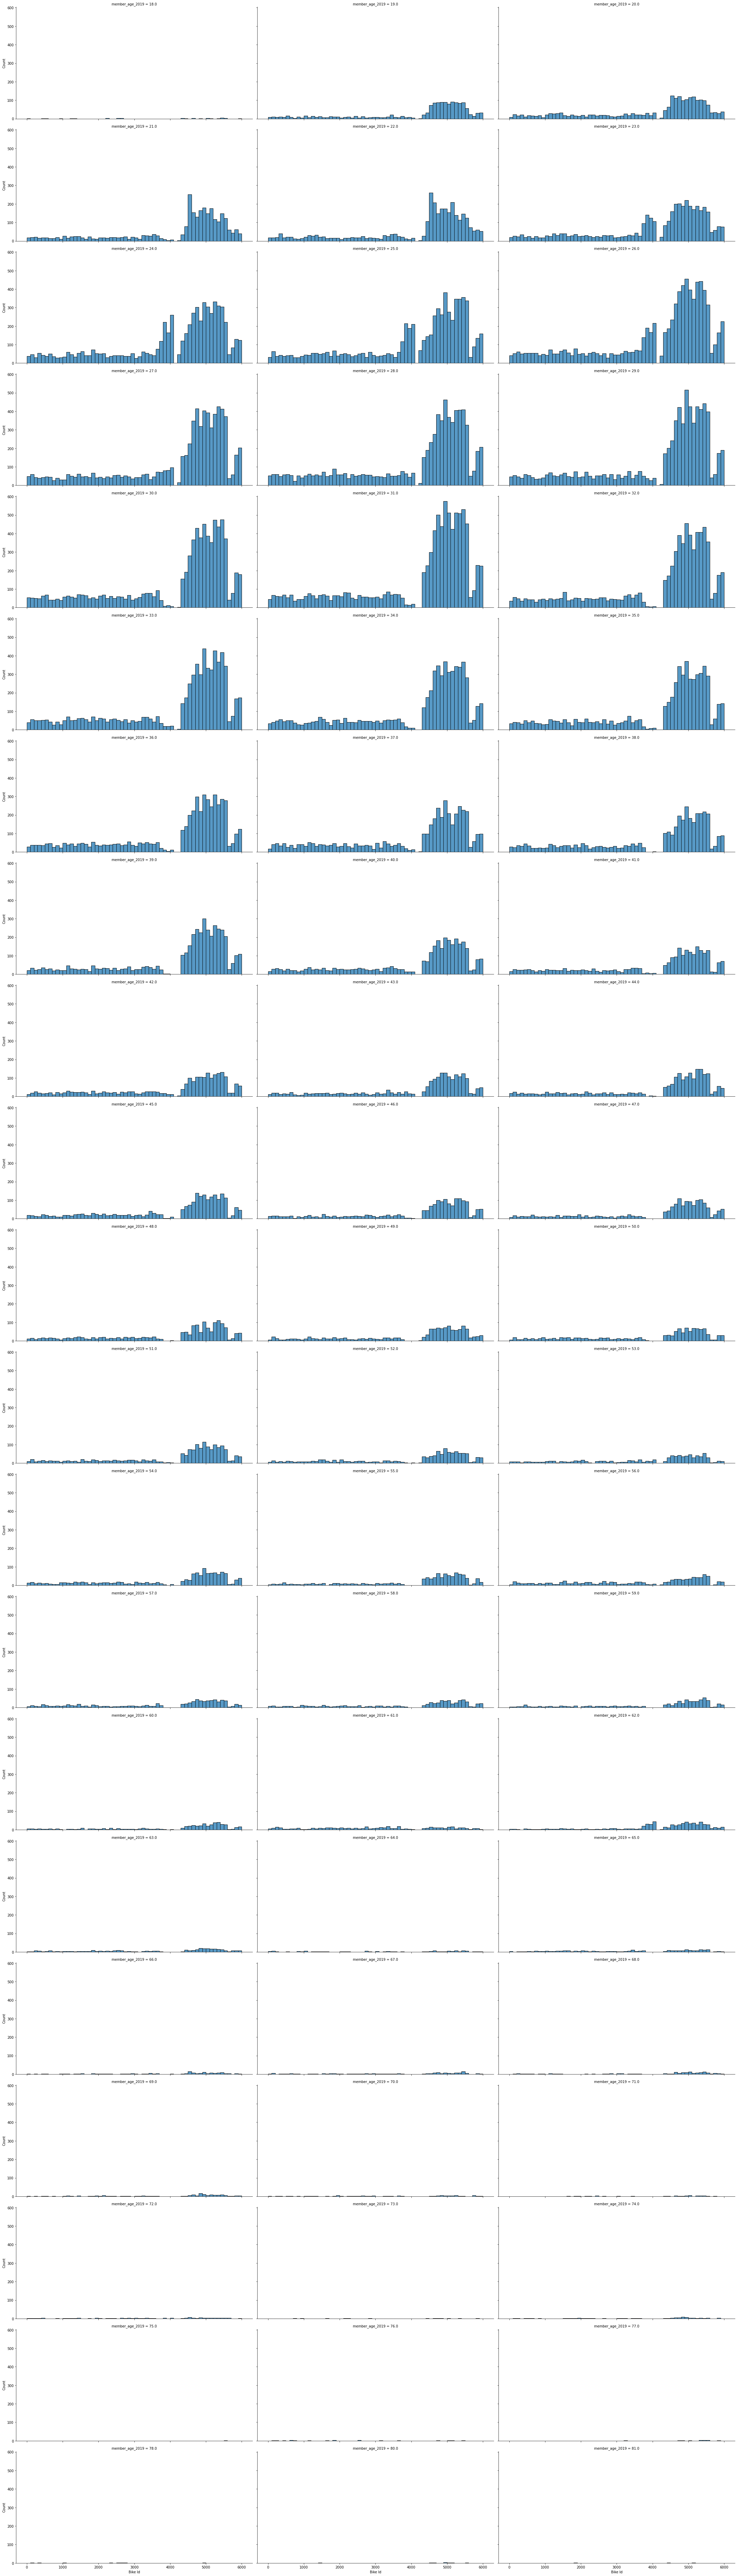

In [80]:
bins = np.arange(0, 6100, 100)
g = sb.FacetGrid(data=fgb, col= 'member_age_2019', col_wrap=3, height=5, aspect=2);
g.map_dataframe(sb.histplot, x='bike_id', bins=bins);
g.set_xlabels('Bike Id')
g.set_ylabels('Count');

<b>Observed</b>:

- No bike_ids specified by user age.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- As expected, enhour is highly correlated with sthour.
- The plot shows that mostly there is no relation between ride "duration_sec" and "member_age_2019". 
- The data shows more rides for Males, Subscribers, No bike_share_for_all_trip users.
- From day 15 to 28 the median bike_id is almost the same.
- The highest bike_ids are used from day 15 to 28.
- Most used bike_ids are from 3991 to 6638.
- The 'Customer' user type median ride duration is higher than the 'Subscriber' user type and with higher frequency.
- Noticeable high frequency in ages for users who use bike share for all trip with a low median age.
- Noticeable low frequency in ages for users who don't use bike share for all trip with a high median age.
- Noticeable higher ride duration for non-bike share for all rides users.
- Noticed that the Subscriber user type counts are much higher than the Customer user type counts in all stations.
- The highest Subscriber user type count is 3369.0 in the Market St at 10th St station.
- The highest Customer user type count is 417.0 in the San Francisco Ferry Building (Harry Bridges Plaza) station.
- Noticed that the max three values for Male, Female, and Other (2693, 873, 73) are all in the same station "Market St at 10th St".
- Three stations made less than 5 rides.
- Most rides in all stations are with "bike share for all trip":No.
- Two beaks for No "bike share for all trip" in the hours 8, 17 (Bimodal shape).
- Noticed that "bike share for all trip":Yes users count is almost the same on all days of the week with a small difference on weekends.
- Noticed that ("bike share for all trip":No) users' smallest count is on weekends.
- Noticed that ("bike share for all trip":No) users count beak is on Thursday.
- "Bimodal shape" Two beaks for Male, Female, and Other "member_gender" in the hours 8, 17.
- Noticed that "member_gender" Other type count is almost the same on all days of the week with a small decrease in weekends.
- Noticed that "member_gender" type's smallest count is on weekends.
- Noticed that "member_gender" types count beak is on Thursday.
- "Bimodal shape" Two beaks for Subscriber and Customer "user_type" in the hours 8, 17 
- Noticed that "user_type" Customer type count is almost the same on all days of the week with a small decrease on weekends.
- Noticed that "user_type" type's smallest count is on weekends.
- Noticed that "user_type" types count beak is on Thursday.
- Noticed that "user_type" Customer count is smaller in all "member_gender" types than Subscriber.
- Noticed that "user_type" Subscriber count is larger in all "member_gender" types than Customer.
- Noticed that "member_gender" Male has the highest count in both "user_type" types.
- Noticed that "member_gender" Other has the lowest count in both "user_type" types.
- Noticed that (No "bike_share_for_all_trip") count for "user_type" Subscriber is larger than Customer.
- Only "user_type" Subscribe has "bike_share_for_all_trip".
- Male has the largest count in both types of 'bike_share_for_all_trip' types.
- 'bike_share_for_all_trip':No count is larger than the Yes count.
- Other has the smallest count in both types of 'bike_share_for_all_trip' types.
- User type "Customer" don't have "bike_share_for_all_trip".
- No bike_ids specified by user age.
- No bike_ids specified by Station name.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There is a possibly moderate relation between "star_station_id" and "end_station_id".
- "duration_sec" median and frequency for Customer is higher than Subscriber.
- "bike_id" median for Other higher than the median for Female and median for Female higher than the median for Male.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical variables of 'user_type', 'member_gender', 'bike_share_for_all_trip', 'stday_name' play into the relationship between 'duration_sec', 'stday_num', and 'member_age_2019'.

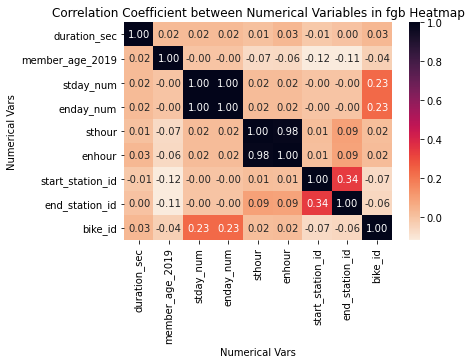

In [81]:
# Creating a heatmap that shows the correlation coefficient between numerical variables in fgb.

sb.heatmap(fgb[num_vars].corr(), cmap='rocket_r', annot=True, fmt='.2f');
plt.xlabel('Numerical Vars')
plt.ylabel('Numerical Vars')
plt.title('Correlation Coefficient between Numerical Variables in fgb Heatmap');

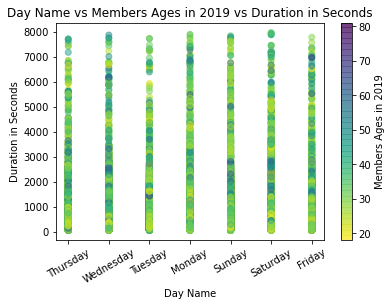

In [82]:
# The relation between stday_name, duration_sec, and member_age_2019.
plt.scatter(data=fgb, x='stday_name', y='duration_sec', c='member_age_2019', cmap='viridis_r', alpha=0.5);
plt.colorbar(label='Members Ages in 2019');
plt.xticks(rotation=30);
plt.xlabel('Day Name')
plt.ylabel('Duration in Seconds')
plt.title('Day Name vs Members Ages in 2019 vs Duration in Seconds');

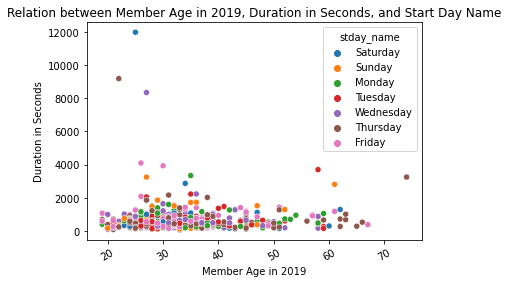

In [83]:
# The relation between member_age_2019, duration_sec, and stday_name.
sb.scatterplot(data=fgb_samp, hue='stday_name', y='duration_sec', x='member_age_2019');
plt.xticks(rotation=30);
plt.xlabel('Member Age in 2019')
plt.ylabel('Duration in Seconds')
plt.title('Relation between Member Age in 2019, Duration in Seconds, and Start Day Name');

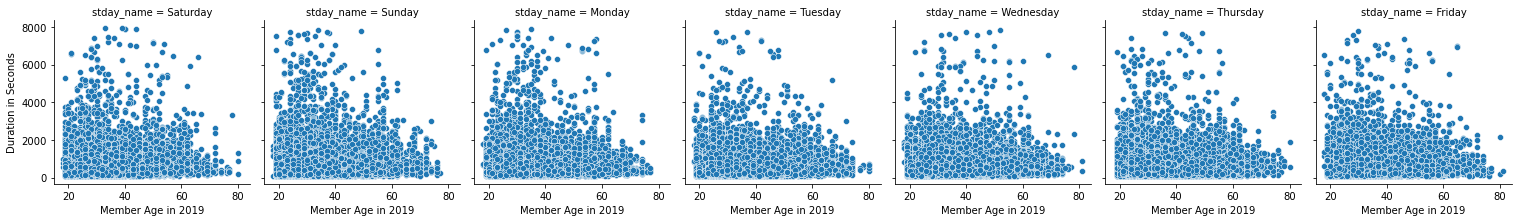

In [84]:
# The relation between member_age_2019, duration_sec, and stday_name.

g = sb.FacetGrid(fgb, col='stday_name')
g.map_dataframe(sb.scatterplot, x='member_age_2019', y='duration_sec');
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

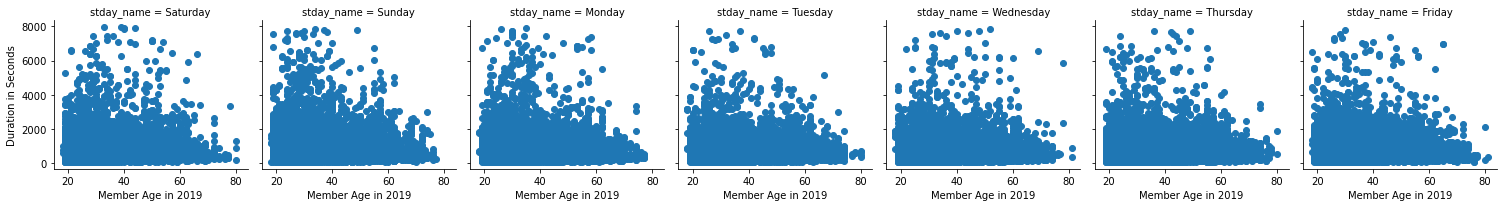

In [85]:
# The relation between member_age_2019, duration_sec, and stday_name.

g= sb.FacetGrid(data=fgb, col='stday_name')
g.map(plt.scatter, 'member_age_2019', 'duration_sec');
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

<b>Observed</b>:

- Mostly the stday_name variable has no effect on the relation between member age and ride duration.
- Mostly, the higher the age, the lower the ride duration.

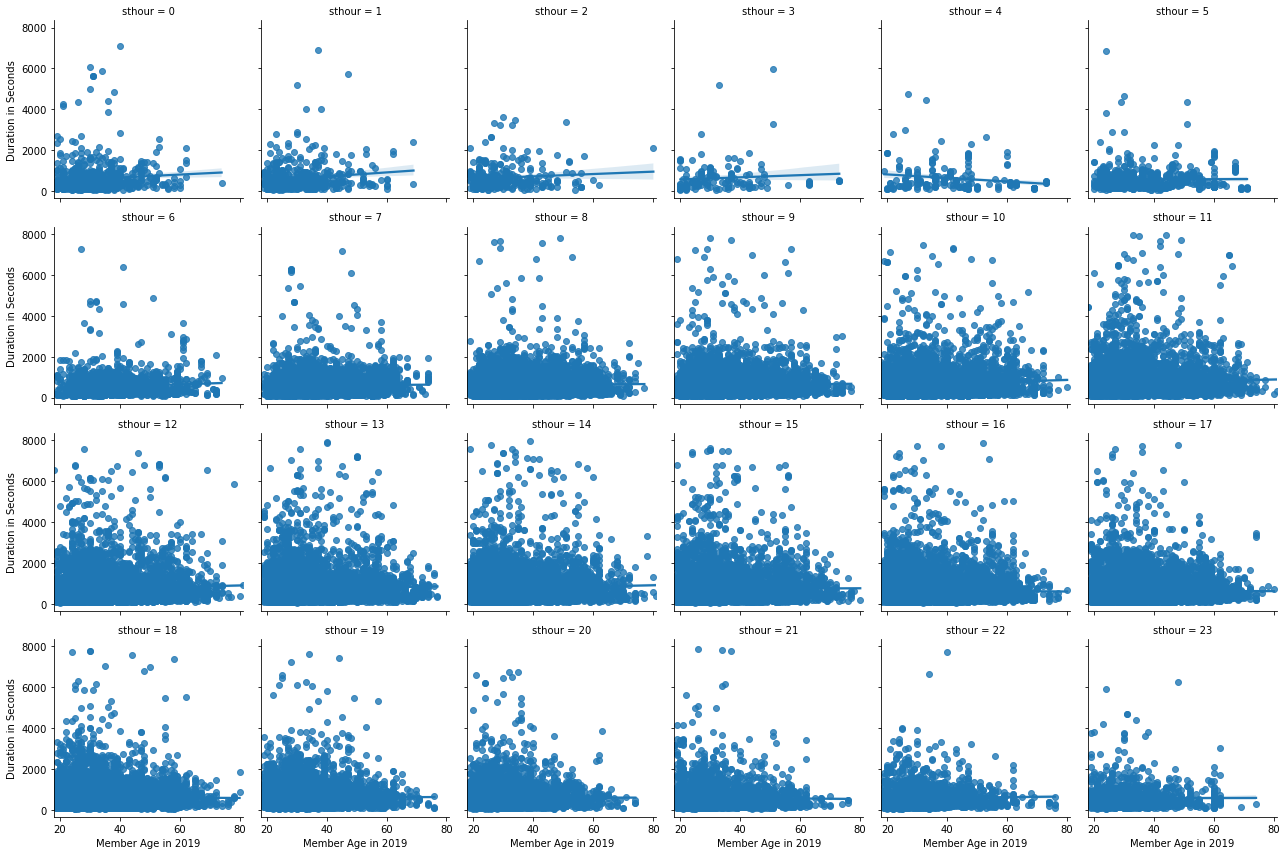

In [86]:
# The relation between member_age_2019, duration_sec, and sthour.

g= sb.FacetGrid(data=fgb, col='sthour', col_wrap=6)
g.map(sb.regplot, 'member_age_2019', 'duration_sec');
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

<b>Observed</b>:

- From hour 8 to hour 18 there is a high increase in rides duration and age frequency.

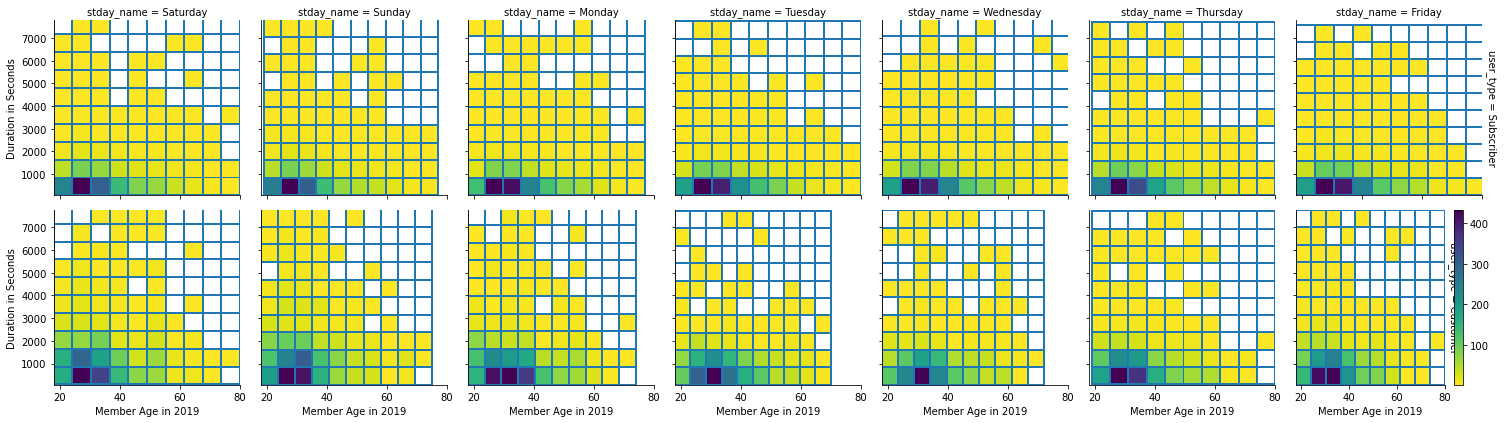

In [87]:
# The relation between stday_name, user_type, member_age_2019, and duration_sec.

g= sb.FacetGrid(data=fgb, col='stday_name', row='user_type', margin_titles=True)
g.map_dataframe(plt.hist2d, 'member_age_2019', 'duration_sec', cmin=0.5, cmap='viridis_r');
plt.colorbar();
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

<b>Observed</b>:

- Noticeable more trips taken by Subscribers.
- More frequency in trips duration of Subscribers.
- Most High duration trips are taken by Customers.

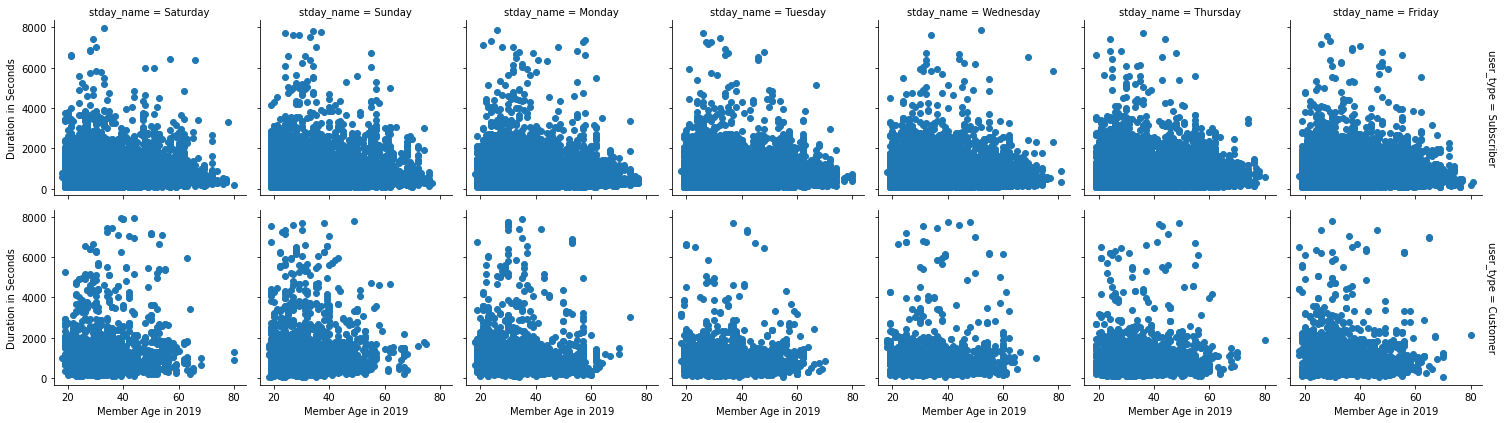

In [88]:
# The relation between stday_name, user_type, member_age_2019, and duration_sec.

g= sb.FacetGrid(data=fgb, col='stday_name', row='user_type', margin_titles=True)
g.map_dataframe(plt.scatter, 'member_age_2019', 'duration_sec');
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

<b>Observed</b>:

- Customers rides duration is usually higher than Subscribers ride duration. 
- Increase in age ranges for Subscribers than Customers.

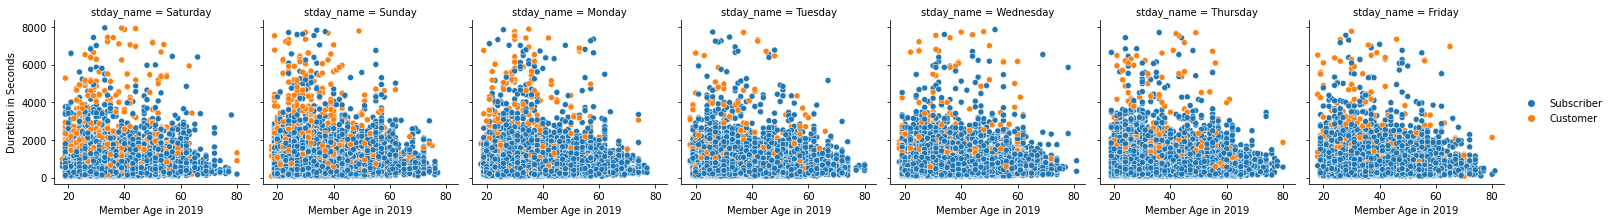

In [89]:
# The relation between stday_name, user_type, member_age_2019, and duration_sec.

g = sb.FacetGrid(fgb, col='stday_name')
g.map_dataframe(sb.scatterplot, x='member_age_2019', y='duration_sec', hue='user_type');
g.add_legend();
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

<b>Observed</b>:

- Customers rides duration is usually higher than Subscribers ride duration. 
- Increase in age ranges for Subscribers than Customers.

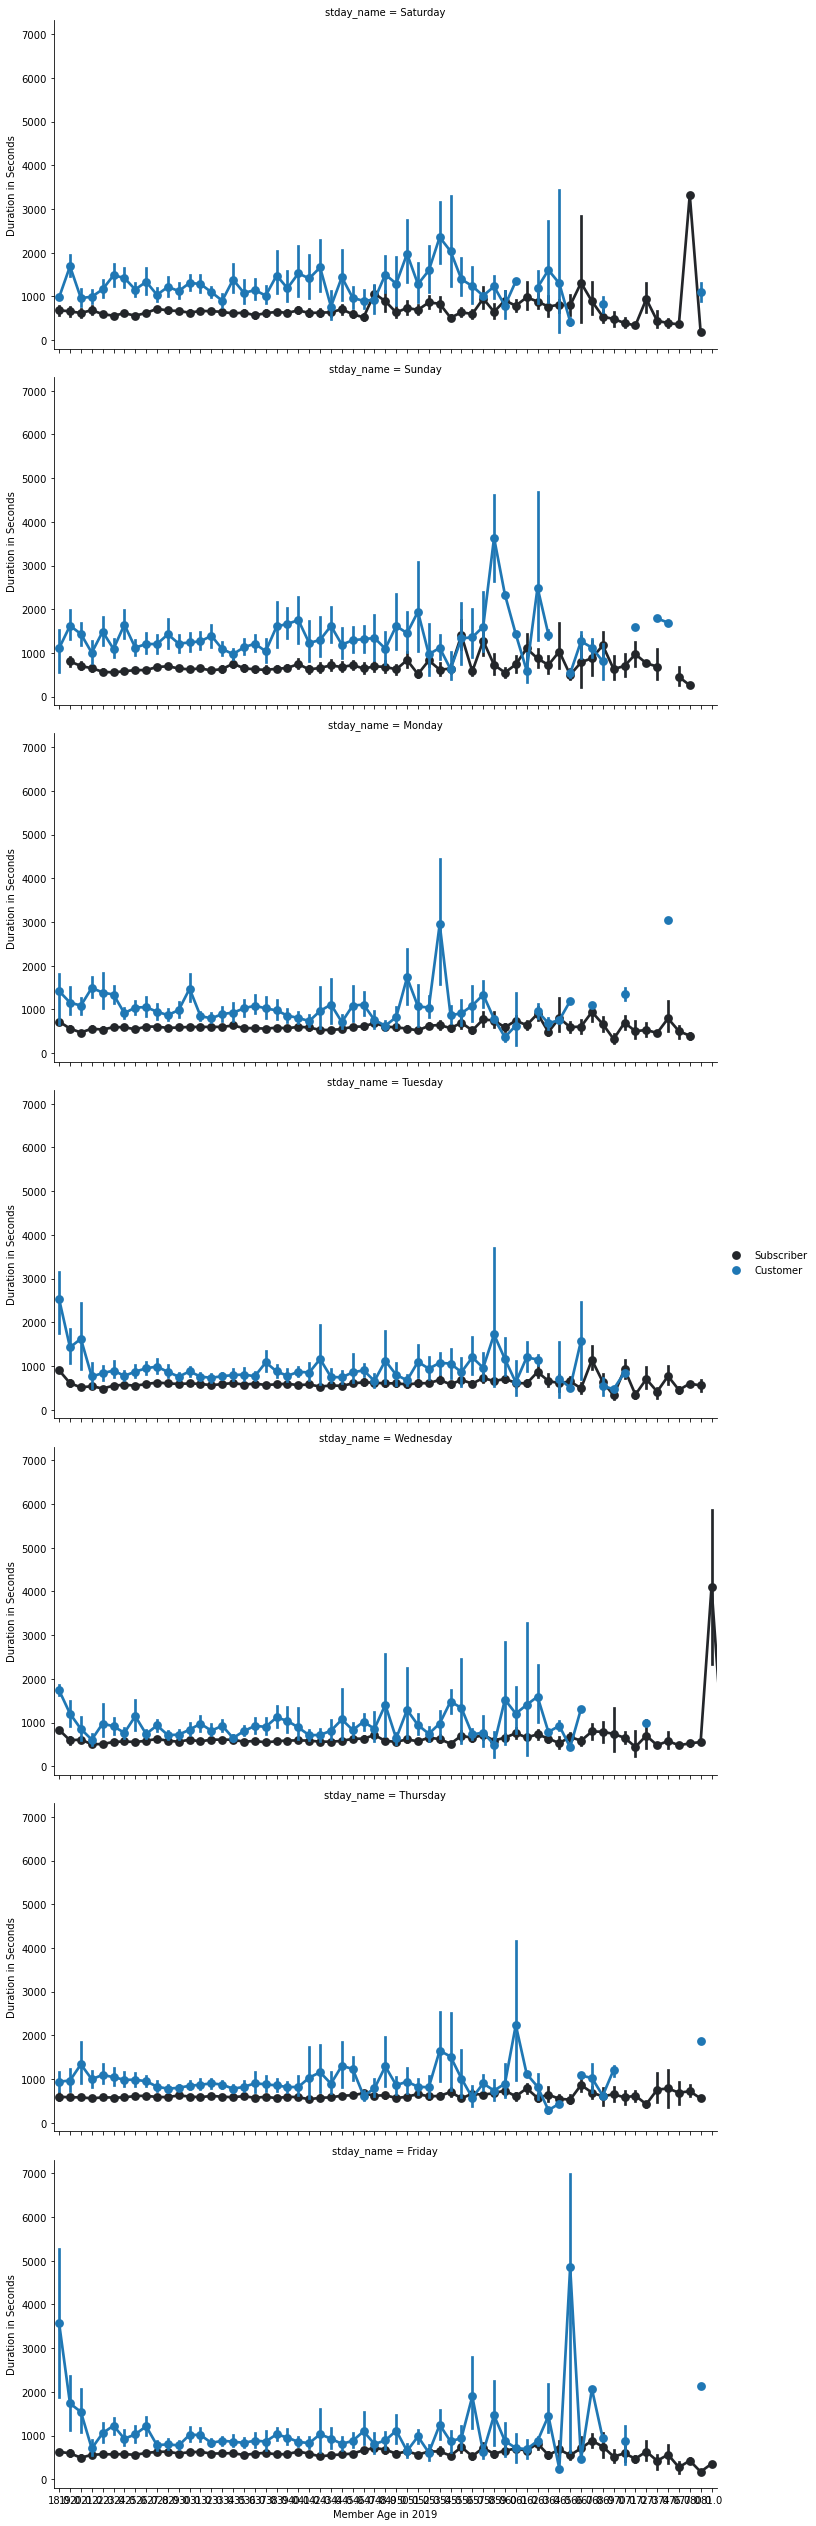

In [90]:
# The relation between stday_name, user_type, member_age_2019, and duration_sec.

g = sb.FacetGrid(fgb, col='stday_name', col_wrap=1, height=5, aspect=2)
g.map_dataframe(sb.pointplot, x='member_age_2019', y='duration_sec', hue='user_type');
g.add_legend();
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

<b>Observed</b>:

- Customers rides duration is usually higher than Subscribers ride duration. 
- Increase in age ranges for Subscribers than Customers.

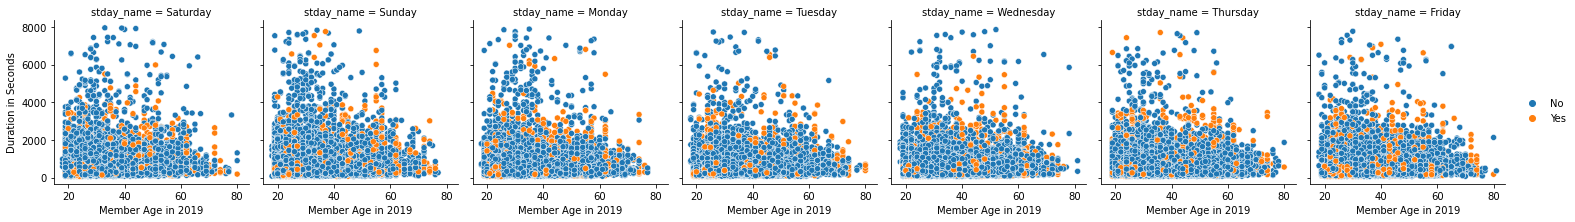

In [91]:
# The relation between stday_name, bike_share_for_all_trip, member_age_2019, and duration_sec.

g = sb.FacetGrid(fgb, col='stday_name')
g.map_dataframe(sb.scatterplot, x='member_age_2019', y='duration_sec', hue='bike_share_for_all_trip');
g.add_legend();
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

<b>Observed</b>:

- All days have higher "No" frequency for "bike_share_for_all_trip"  
- Users with "No" for "bike_share_for_all_trip" have higher ride duration ranges.

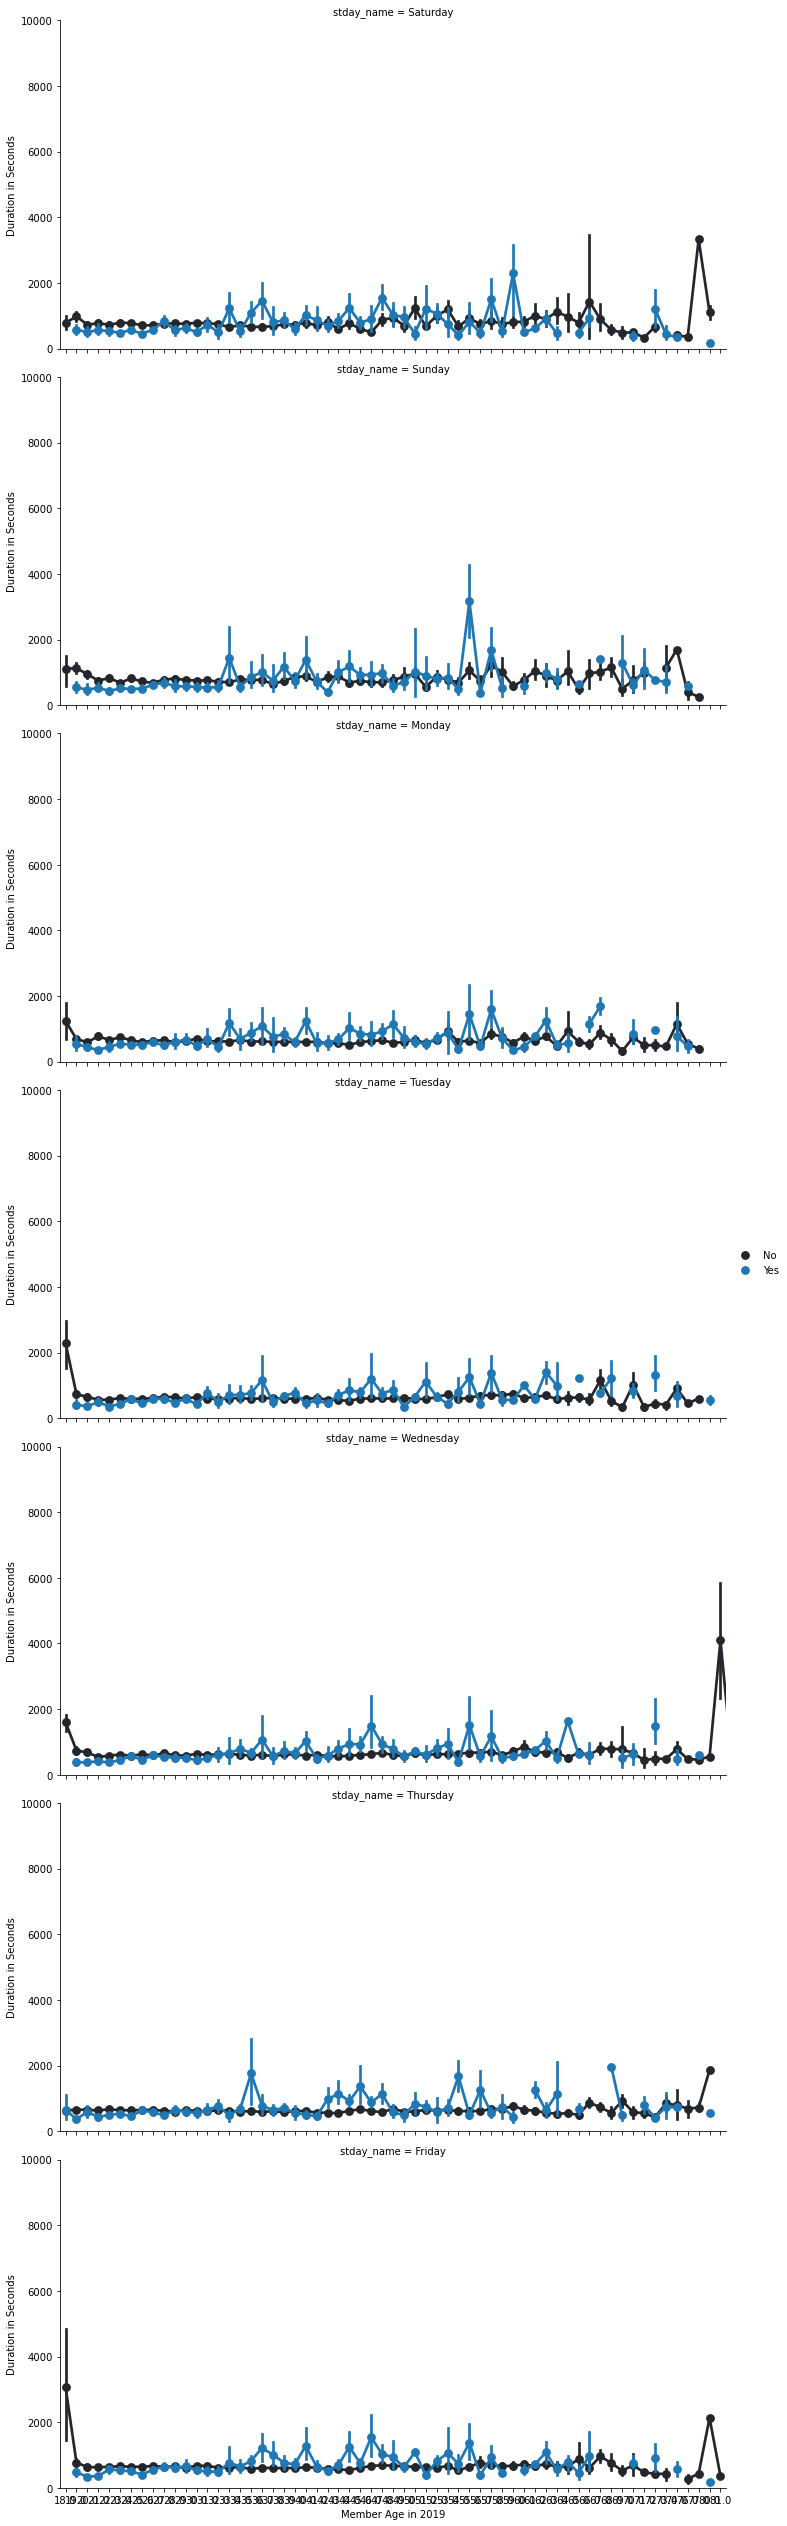

In [92]:
# The relation between stday_name, bike_share_for_all_trip, member_age_2019, and duration_sec.

g = sb.FacetGrid(fgb, col='stday_name', col_wrap=1, height=5, aspect=2)
g.map_dataframe(sb.pointplot, x='member_age_2019', y='duration_sec', hue='bike_share_for_all_trip');
plt.ylim(0, 10000)
g.add_legend();
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

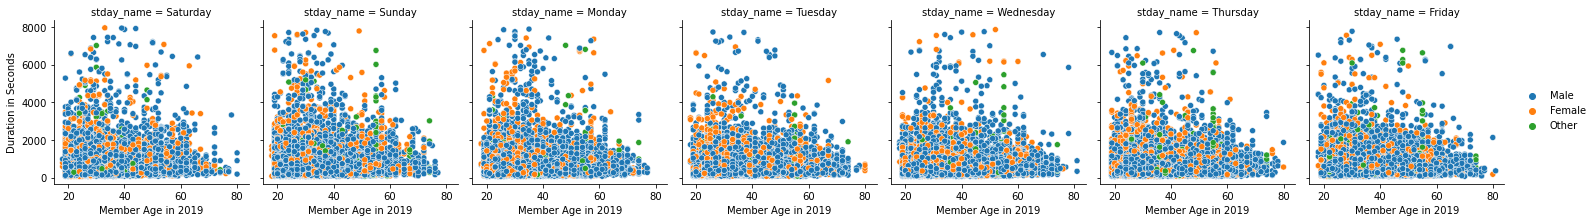

In [93]:
# The relation between stday_name, member_gender, member_age_2019, and duration_sec.

g = sb.FacetGrid(fgb, col='stday_name')
g.map_dataframe(sb.scatterplot, x='member_age_2019', y='duration_sec', hue='member_gender');
g.add_legend();
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

<b>Observed</b>:

- All days have higher "Male" frequency for "member_gender".  
- All days have higher ride durations for "Male".
- Other gender has slightly higher ride duration on somedays.

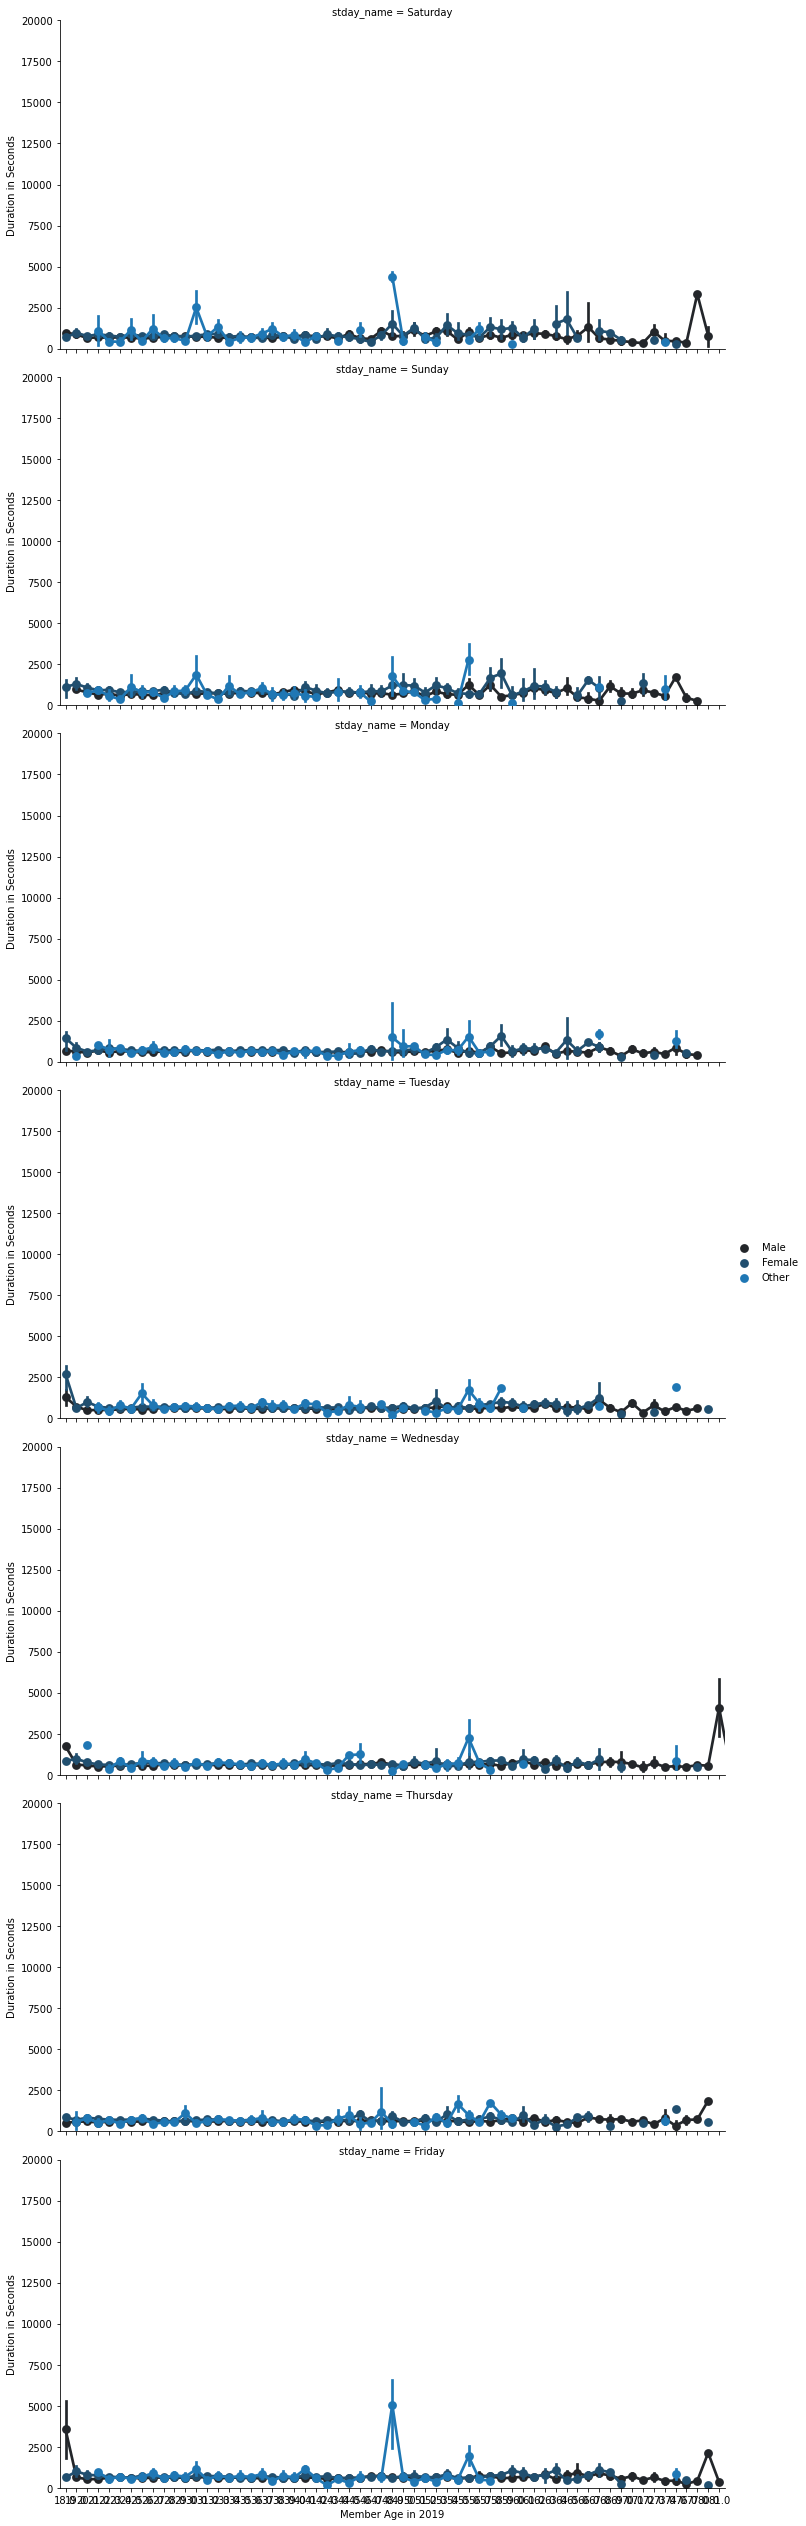

In [94]:
# The relation between stday_name, member_gender, member_age_2019, and duration_sec.

g = sb.FacetGrid(fgb, col='stday_name', col_wrap=1, height=5, aspect=2)
g.map_dataframe(sb.pointplot, x='member_age_2019', y='duration_sec', hue='member_gender');
plt.ylim(0,20000)
g.add_legend();
g.set_xlabels('Member Age in 2019')
g.set_ylabels('Duration in Seconds');

<b>Observed</b>:

- All days have higher "Male" frequency for "member_gender".  
- All days have higher ride durations for "Male".
- Other gender has slightly higher ride duration on somedays.

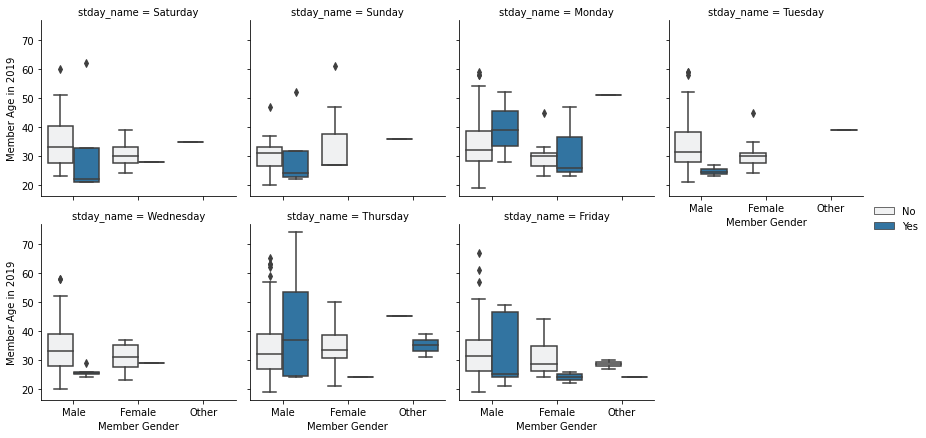

In [95]:
# The relation between stday_name, member_gender, member_age_2019, and bike_share_for_all_trip.

g = sb.FacetGrid(fgb_samp, col='stday_name', col_wrap=4)
g.map_dataframe(sb.boxplot, x='member_gender', y='member_age_2019', hue='bike_share_for_all_trip');
g.add_legend();
g.set_xlabels('Member Gender')
g.set_ylabels('Member Age in 2019');

<b>Observed</b>:

- "Male" has the highest age ranges for both "bike_share_for_all_trip" values.
- For "Male" all days have higher "age" range for "No" - "bike_share_for_all_trip" except Sunday and Monday. 
- Other mostly does not participate in "bike_share_for_all_trip".
- Other didn't make any rides on Wednesday and Friday.

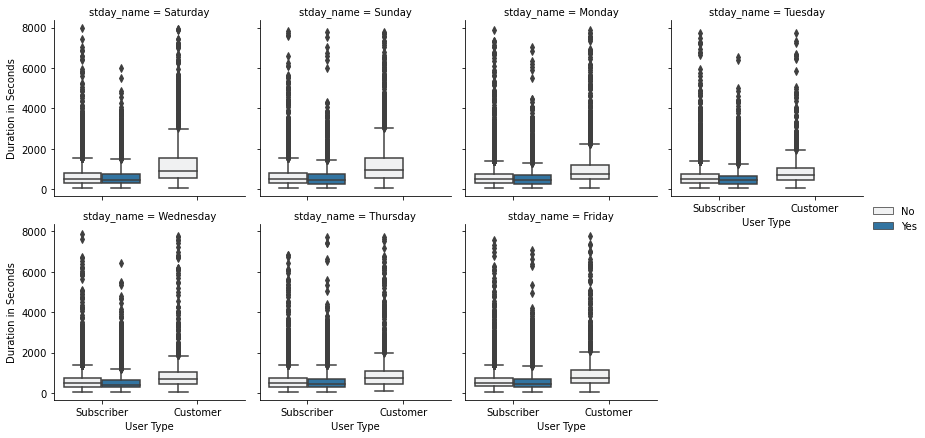

In [96]:
# The relation between stday_name, user_type, duration_sec, and bike_share_for_all_trip.

g = sb.FacetGrid(fgb, col='stday_name', col_wrap=4)
g.map_dataframe(sb.boxplot, x='user_type', y='duration_sec', hue='bike_share_for_all_trip');
g.add_legend();
g.set_xlabels('User Type')
g.set_ylabels('Duration in Seconds');

<b>Observed</b>

- Ride duration for Customer is mostly higher than for Subscriber.
- Customer don't have "bike_share_for_all_trip".
- Subscriber ride duration for both types of "bike_share_for_all_trip" is almost the same.

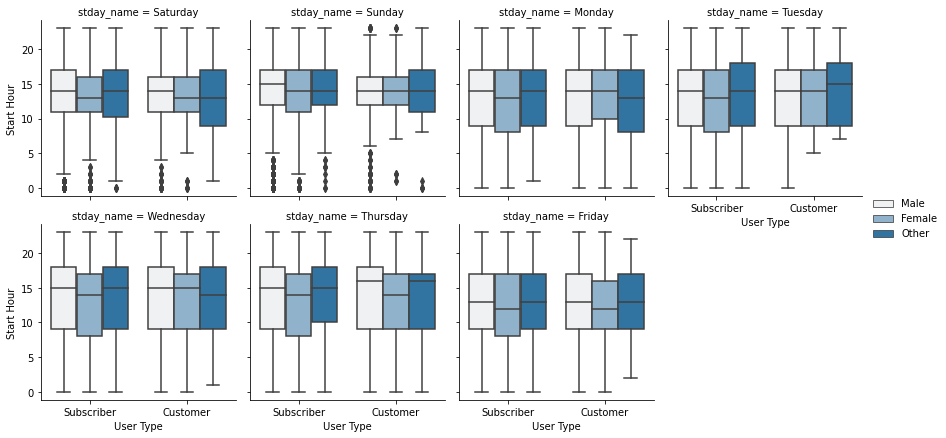

In [97]:
# The relation between stday_name, user_type, sthour, and member_gender.

g = sb.FacetGrid(fgb, col='stday_name', col_wrap=4)
g.map_dataframe(sb.boxplot, x='user_type', y='sthour', hue='member_gender');
g.add_legend();
g.set_xlabels('User Type')
g.set_ylabels('Start Hour');

<b>Observed</b>

- During weekdays most rides are between 8 and 18.
- During weekends most rides are between 10 and 17.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Mostly the stday_name variable does not affect the relationship between member age and ride duration.
- Mostly, the higher the age, the lower the ride duration.
- From hour 8 to hour 18 there is a high increase in rides duration and age frequency.
- Customers' rides duration is usually higher than Subscribers' ride duration. 
- Increase in age ranges for Subscribers than Customers.
- All days have higher "No" frequency for "bike_share_for_all_trip"  
- Users with "No" for "bike_share_for_all_trip" have higher ride duration ranges.
- All days have a higher "Male" frequency for "member_gender".  
- All days have higher ride durations for "Male".
- Other gender has slightly higher ride duration on some days.
- "Male" has the highest age ranges for both "bike_share_for_all_trip" values.
- For "Male" all days have a higher "age" range for "No":"bike_share_for_all_trip" except Sunday and Monday. 
- Other does not participate in "bike_share_for_all_trip".
- Other didn't make any rides on Wednesday and Friday.
- Ride duration for Customers is mostly higher than for Subscribers.
- Customer don't have "bike_share_for_all_trip".
- Subscriber ride duration for both types of "bike_share_for_all_trip" is almost the same.
- During weekdays most rides are between 8 and 18.
- During weekends most rides are between 10 and 17.


### Were there any interesting or surprising interactions between features?

- From hour 8 to hour 18 there is a high increase in rides duration and age frequency.
- Customers' rides duration is usually higher than Subscribers' ride duration. 
- Increase in age ranges for Subscribers than Customers.
- Users with "No" for "bike_share_for_all_trip" have higher ride duration ranges.
- Other gender has slightly higher ride duration on some days.
- Other does not participate in "bike_share_for_all_trip".
- Other didn't make any rides on Wednesday and Friday.
- Customer don't have "bike_share_for_all_trip".
- During weekends most rides are between 10 and 17.